# Working Notebook for Clustering Project

By: David Schneemann

In [1]:
# regular imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import math
import env

# default pandas decimal number display format
pd.options.display.float_format = '{:20,.2f}'.format

import warnings
warnings.filterwarnings("ignore")

# Wrangling
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.feature_selection import SelectKBest, RFE, f_regression, SequentialFeatureSelector
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.cluster import KMeans
from scipy import stats
import sklearn.preprocessing
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr, spearmanr, kruskal

# Personal Imports
import acquire
import prepare
import explore
import model

## Acquire

In [2]:
df = acquire.wrangle_zillow()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52441 entries, 0 to 52440
Data columns (total 69 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   typeconstructiontypeid        76 non-null     float64
 1   heatingorsystemtypeid         33935 non-null  float64
 2   buildingclasstypeid           0 non-null      object 
 3   architecturalstyletypeid      70 non-null     float64
 4   airconditioningtypeid         13638 non-null  float64
 5   propertylandusetypeid         52441 non-null  float64
 6   id                            52441 non-null  int64  
 7   parcelid                      52441 non-null  int64  
 8   logerror                      52441 non-null  float64
 9   transactiondate               52441 non-null  object 
 10  id                            52441 non-null  int64  
 11  parcelid                      52441 non-null  int64  
 12  basementsqft                  47 non-null     float64
 13  b

In [3]:
df.head()

,typeconstructiontypeid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,propertylandusetypeid,id,parcelid,logerror,transactiondate,...,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,propertylandusedesc,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,typeconstructiondesc
0,NaN,NaN,None,NaN,NaN,261.00,0,14297519,0.03,2017-01-01,...,"11,013.72",None,NaN,"60,590,630,072,012.00",Single Family Residential,None,None,None,None,None
1,NaN,NaN,None,NaN,NaN,261.00,1,17052889,0.06,2017-01-01,...,"5,672.48",None,NaN,"61,110,010,023,006.00",Single Family Residential,None,None,None,None,None
2,NaN,NaN,None,NaN,NaN,261.00,2,14186244,0.01,2017-01-01,...,"6,488.30",None,NaN,"60,590,218,022,012.00",Single Family Residential,None,None,None,None,None
3,NaN,2.00,None,NaN,NaN,261.00,3,12177905,-0.10,2017-01-01,...,"1,777.51",None,NaN,"60,373,001,001,006.00",Single Family Residential,None,None,None,Central,None
4,NaN,2.00,None,NaN,1.00,261.00,6,12095076,-0.00,2017-01-01,...,"9,516.26",None,NaN,"60,374,608,001,014.00",Single Family Residential,Central,None,None,Central,None


## Prepare

In [4]:
df, train, validate, test, x_train, y_train, x_validate, y_validate, x_test, y_test = prepare.prep_zillow(df)

In [5]:
print(df.shape)
print(train.shape)
print(validate.shape)
print(test.shape)

(48266, 32)
(27028, 32)
(11584, 32)
(9654, 32)


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27028 entries, 14875 to 20163
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   logerror                    27028 non-null  float64 
 1   transactiondate             27028 non-null  object  
 2   bathrooms                   27028 non-null  float64 
 3   bedrooms                    27028 non-null  int64   
 4   sq_ft                       27028 non-null  int64   
 5   finishedsquarefeet12        27028 non-null  float64 
 6   location                    27028 non-null  object  
 7   full_bathrooms              27028 non-null  float64 
 8   garage_spaces               27028 non-null  float64 
 9   garagetotalsqft             27028 non-null  float64 
 10  latitude                    27028 non-null  float64 
 11  longitude                   27028 non-null  float64 
 12  lot_sq_ft                   27028 non-null  float64 
 13  poolcnt     

### Additional Clean and Prep

## Main Exploration

In [7]:
train.loc[:, train.columns!='census_quarter_bin']

,logerror,transactiondate,bathrooms,bedrooms,sq_ft,finishedsquarefeet12,location,full_bathrooms,garage_spaces,garagetotalsqft,...,home_value,landtaxvaluedollarcnt,censustractandblock,decade_built,county_encoded,age,censustract_bin,bath_bed_ratio,census_county_bin,age_bin
14875,0.08,2017-03-31,2.00,3,1185,"1,185.00",LA County,2.00,0.00,0.00,...,585000,"425,000.00","60,375,545,111,019.00",70s,0,46,0,0.67,LA,0.33
11357,-0.06,2017-03-14,2.00,2,1494,"1,494.00",LA County,2.00,0.00,0.00,...,311846,"168,588.00","60,374,061,011,000.00",50s,0,67,0,1.00,LA,0.47
20714,-0.10,2017-04-28,2.00,4,1120,"1,120.00",LA County,2.00,0.00,0.00,...,261781,"119,139.00","60,372,400,201,005.00",2000s,0,14,0,0.50,LA,0.13
37077,0.00,2017-07-07,2.50,4,1667,"1,667.00",Orange County,2.00,2.00,531.00,...,633000,"493,028.00","60,590,015,031,037.00",70s,1,47,1,0.62,Orange,0.33
14313,0.01,2017-03-29,2.00,2,1104,"1,104.00",Ventura County,2.00,2.00,0.00,...,615000,"541,000.00","61,110,052,022,015.00",60s,2,57,2,1.00,Ventura,0.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48757,-0.00,2017-08-31,1.00,5,1472,"1,472.00",LA County,1.00,0.00,0.00,...,717618,"480,415.00","60,371,957,101,004.00",1900s,0,117,0,0.20,LA,0.80
24068,-0.00,2017-05-12,3.00,4,1801,"1,801.00",LA County,3.00,0.00,0.00,...,115775,"29,125.00","60,379,006,081,009.00",80s,0,29,0,0.75,LA,0.20
35448,0.14,2017-06-30,2.50,3,3159,"3,159.00",Ventura County,2.00,3.00,727.00,...,1034497,"672,579.00","61,110,058,022,011.00",2000s,2,14,2,0.83,Ventura,0.13
28625,0.01,2017-06-01,2.00,3,1323,"1,323.00",LA County,2.00,0.00,0.00,...,71920,"30,210.00","60,374,057,021,013.00",50s,0,62,0,0.67,LA,0.47


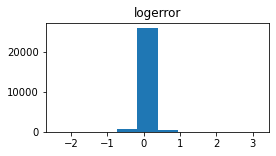

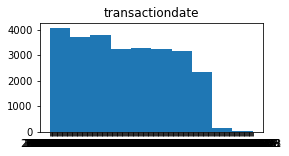

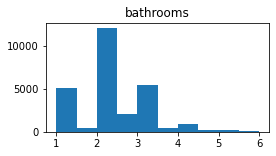

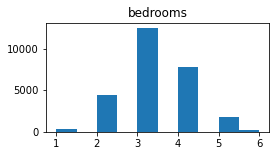

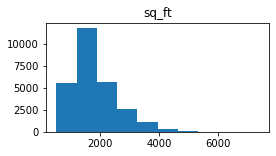

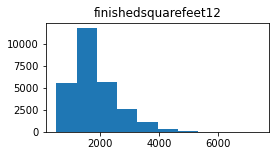

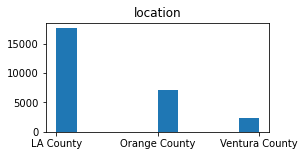

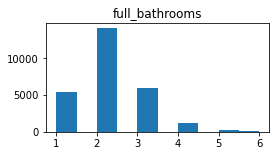

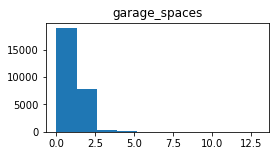

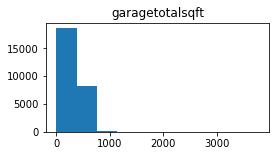

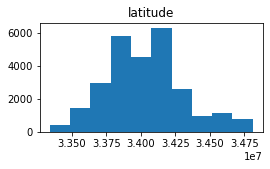

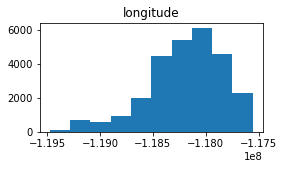

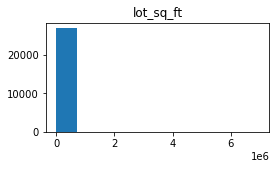

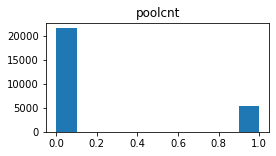

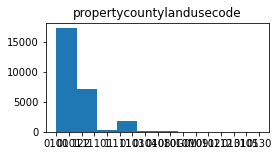

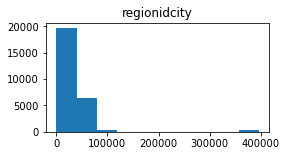

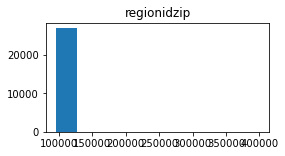

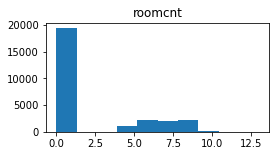

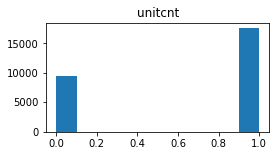

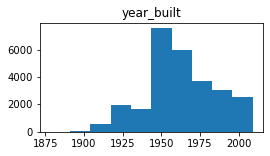

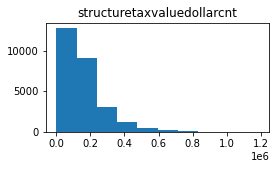

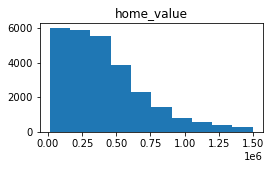

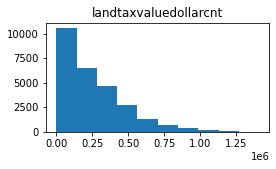

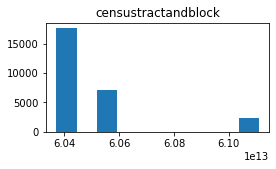

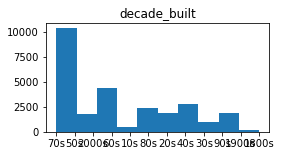

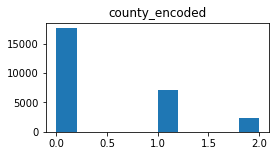

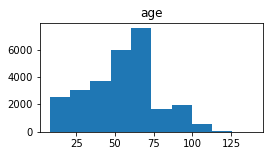

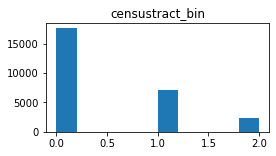

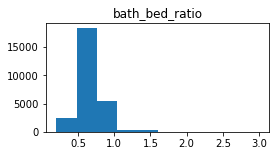

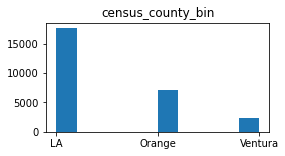

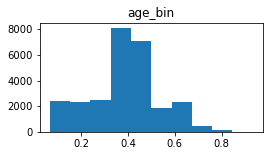

In [8]:
train1 = train.loc[:, train.columns!='census_quarter_bin']

# loop for distribution of all variables, via histogram:
for col in train1.columns:
    plt.figure(figsize=(4,2))
    plt.hist(train1[col])
    plt.title(col)
    plt.show()

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27028 entries, 14875 to 20163
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   logerror                    27028 non-null  float64 
 1   transactiondate             27028 non-null  object  
 2   bathrooms                   27028 non-null  float64 
 3   bedrooms                    27028 non-null  int64   
 4   sq_ft                       27028 non-null  int64   
 5   finishedsquarefeet12        27028 non-null  float64 
 6   location                    27028 non-null  object  
 7   full_bathrooms              27028 non-null  float64 
 8   garage_spaces               27028 non-null  float64 
 9   garagetotalsqft             27028 non-null  float64 
 10  latitude                    27028 non-null  float64 
 11  longitude                   27028 non-null  float64 
 12  lot_sq_ft                   27028 non-null  float64 
 13  poolcnt     

In [10]:
train_explore = train.drop(['decade_built','location','transactiondate','propertycountylandusecode','censustract_bin','census_county_bin','census_quarter_bin'], axis=1)

for col in train_explore.columns:
    plt.figure(figsize=(4,2))
    sns.boxplot(train_explore[col])
    plt.title(col)
    plt.show()

In [11]:
cat_cols = ['bedrooms', 'bathrooms', 'garage_spaces', 'decade_built', 'location']
cont_cols = ['logerror', 'sq_ft', 'home_value', 'lot_sq_ft']

# Creating a plot loop that iterates through all combinations of variables
def plot_categorical_and_continuous_vars(train, cat_cols, cont_cols):
    train_sample = train.sample(5000)
    for cont in cont_cols:
        for cat in cat_cols:
            fig = plt.figure(figsize= (20, 10))
            fig.suptitle(f'{cont} vs {cat}')
            

            plt.subplot(131)
            sns.stripplot(data=train_sample, x = cat, y = cont)
           

            plt.subplot(1, 3, 3)
            sns.boxplot(data = train_sample, x = cont, hue = cat)
            
            
            plt.subplot(1, 3, 2)
            sns.barplot(data = train_sample, x = cat, y = cont)

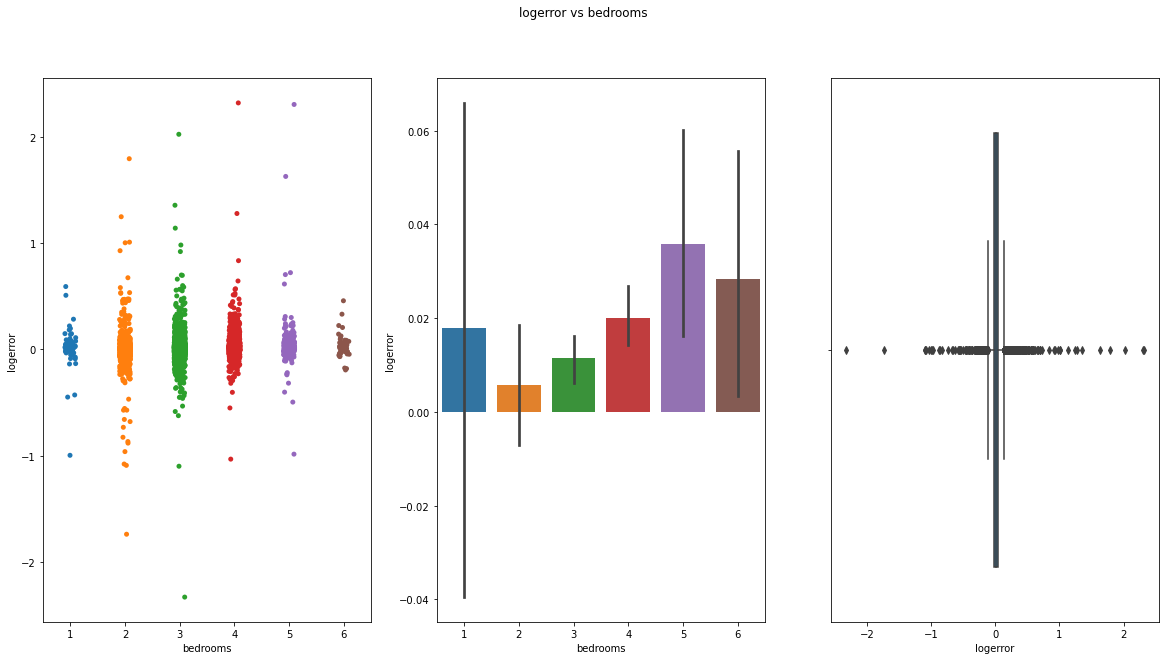

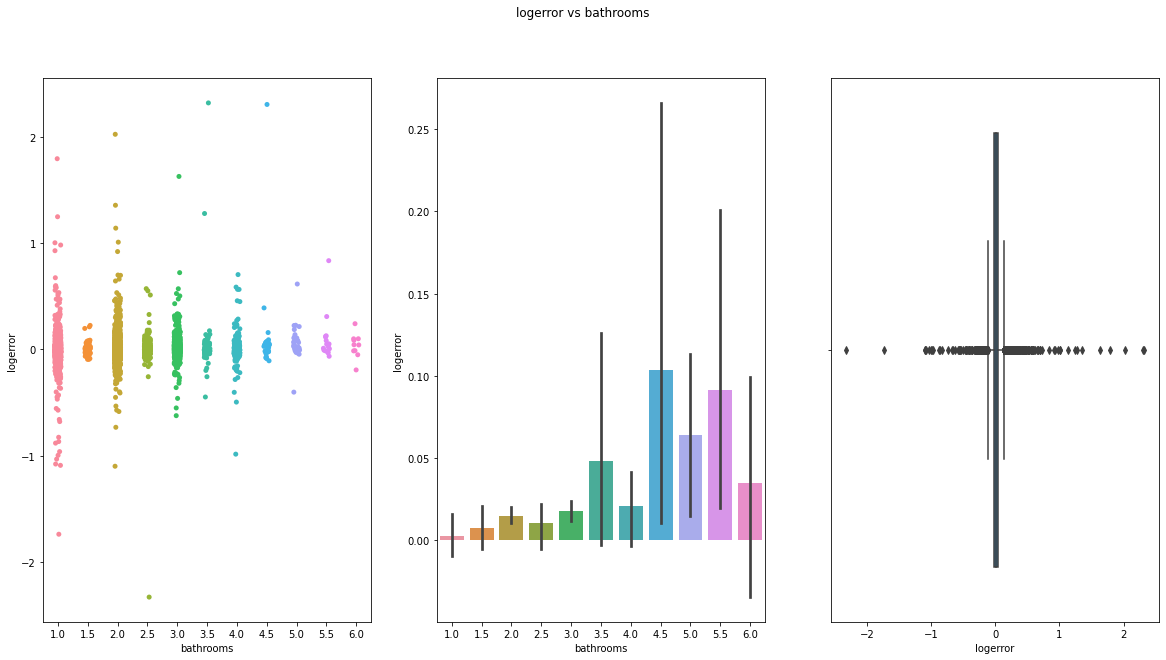

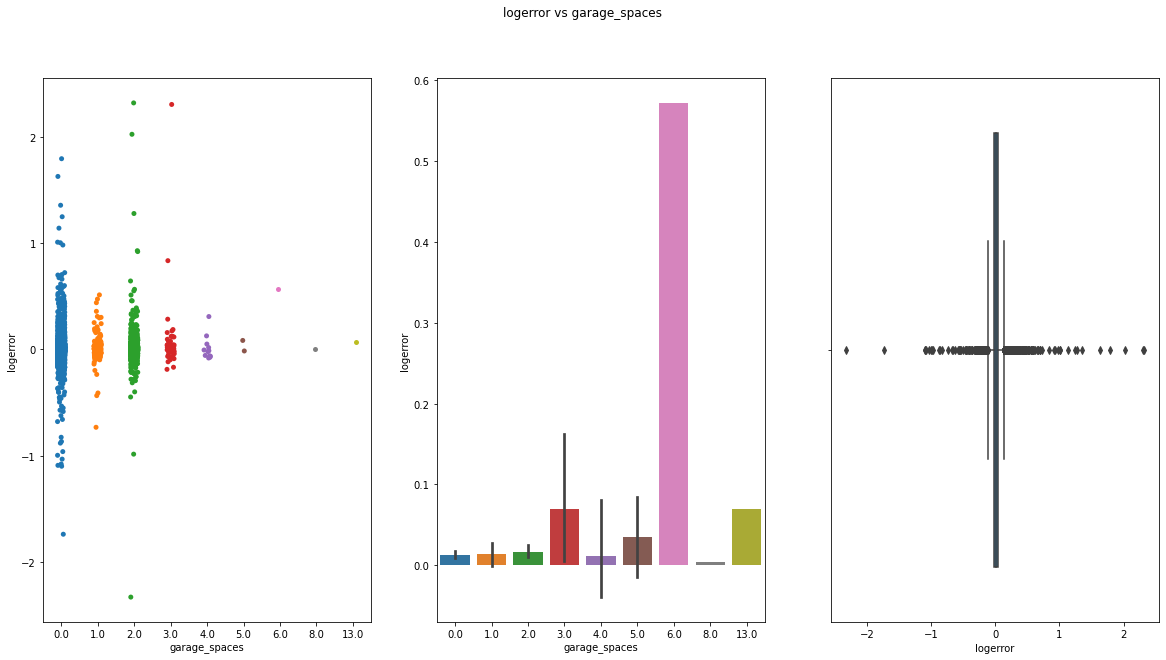

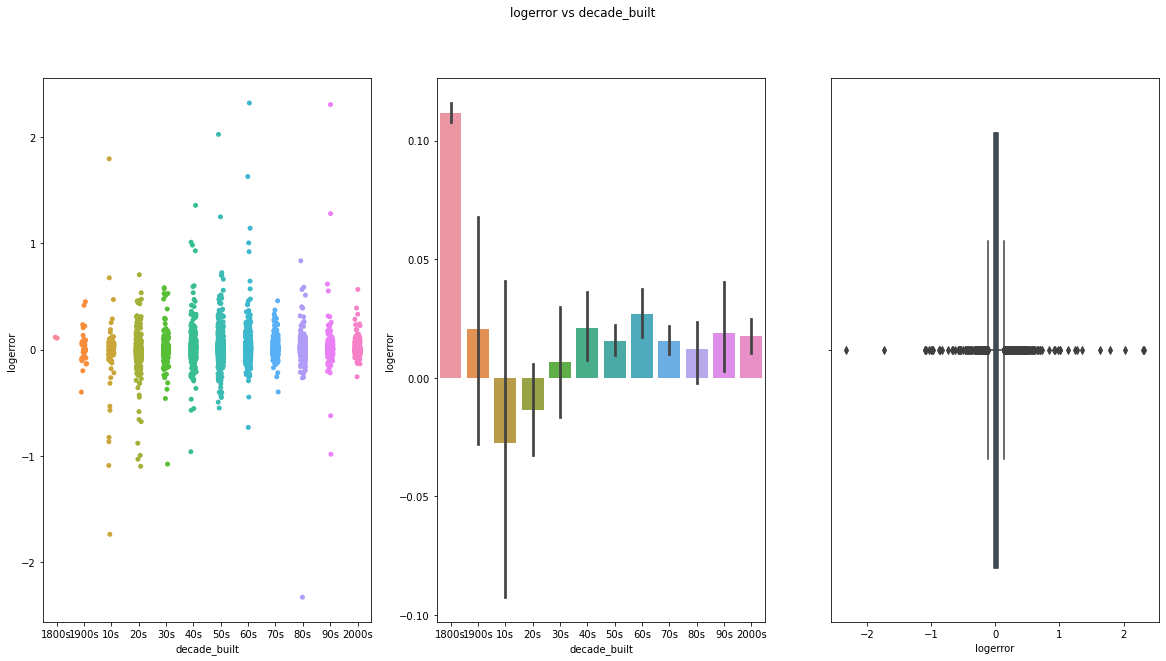

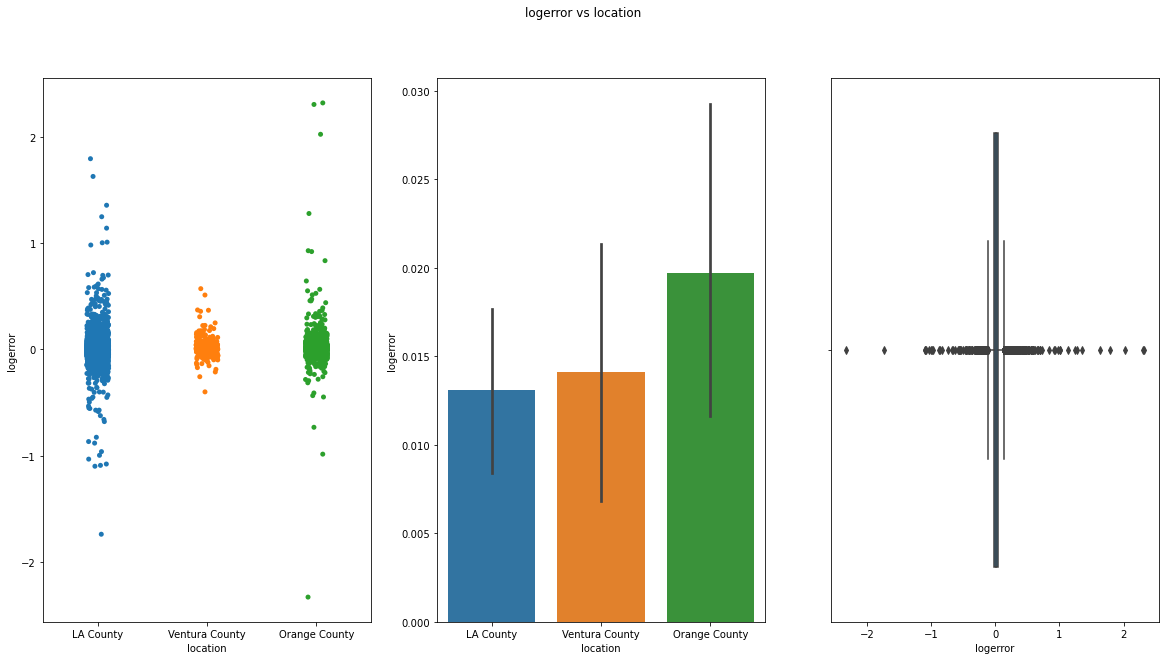

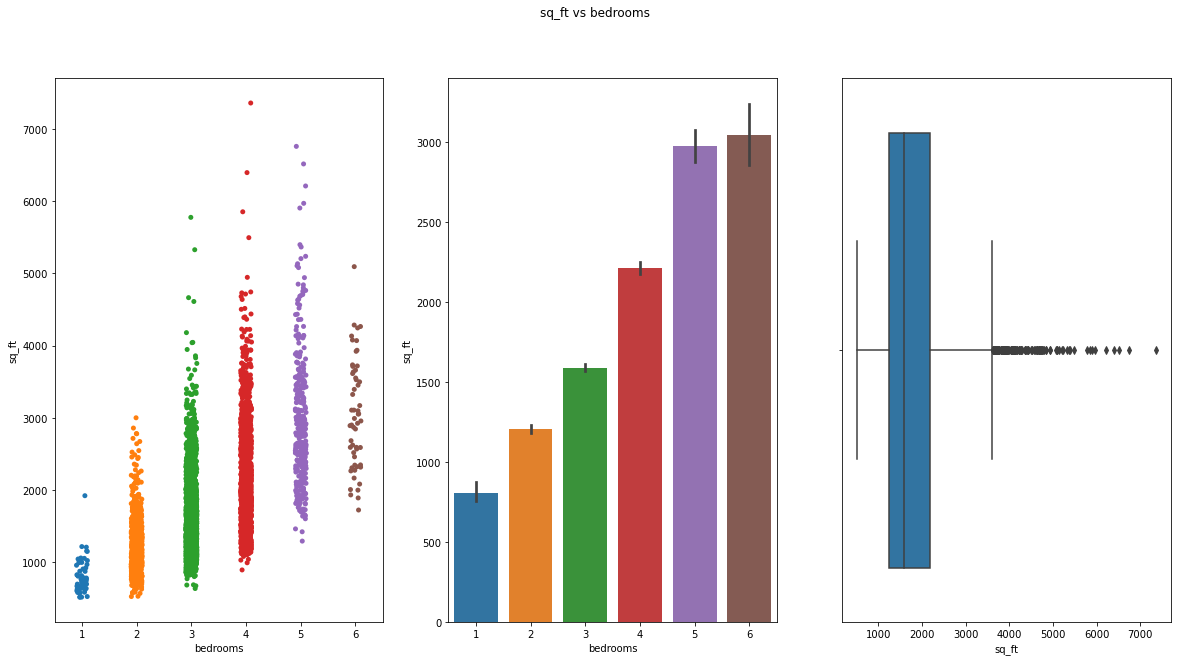

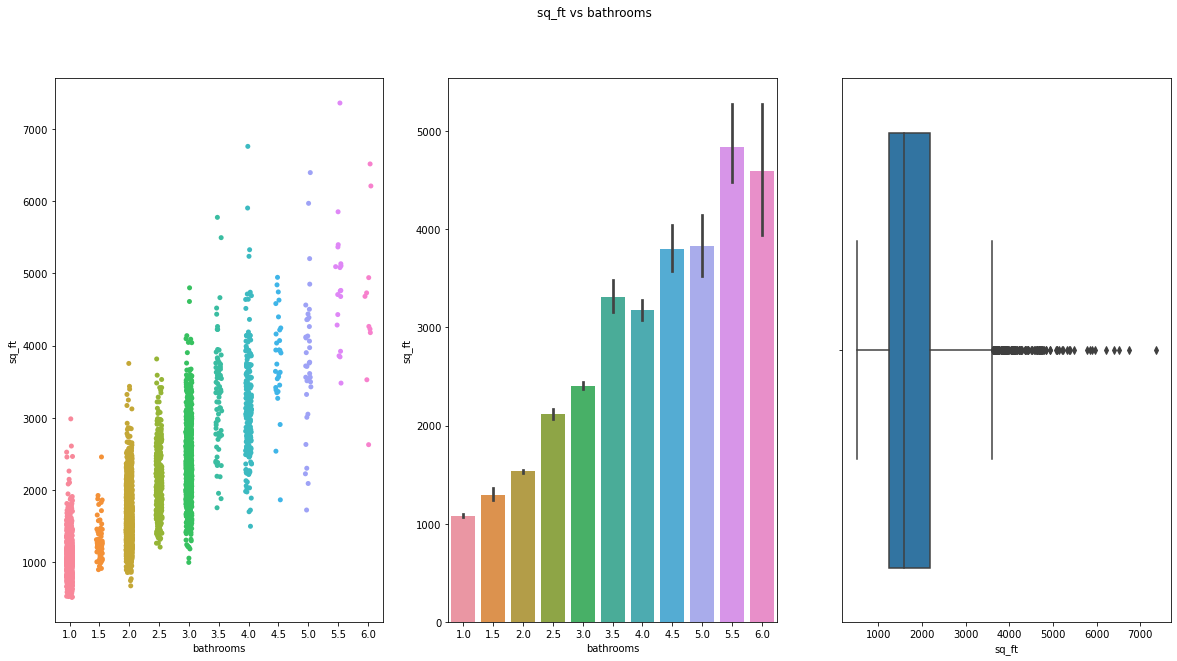

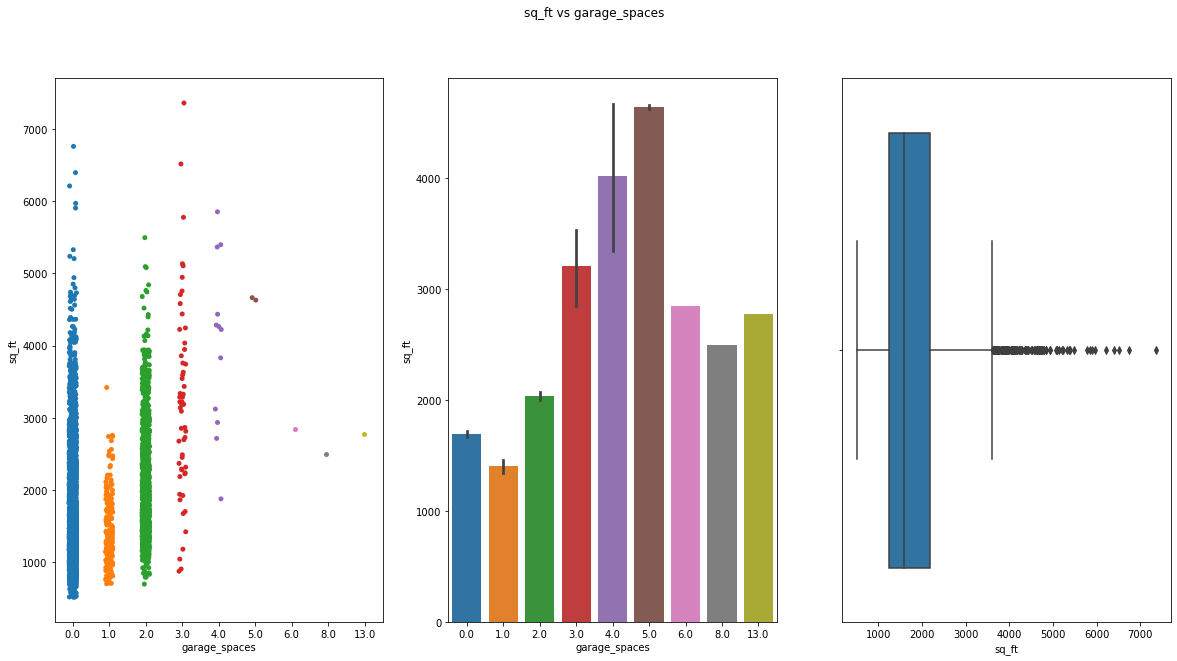

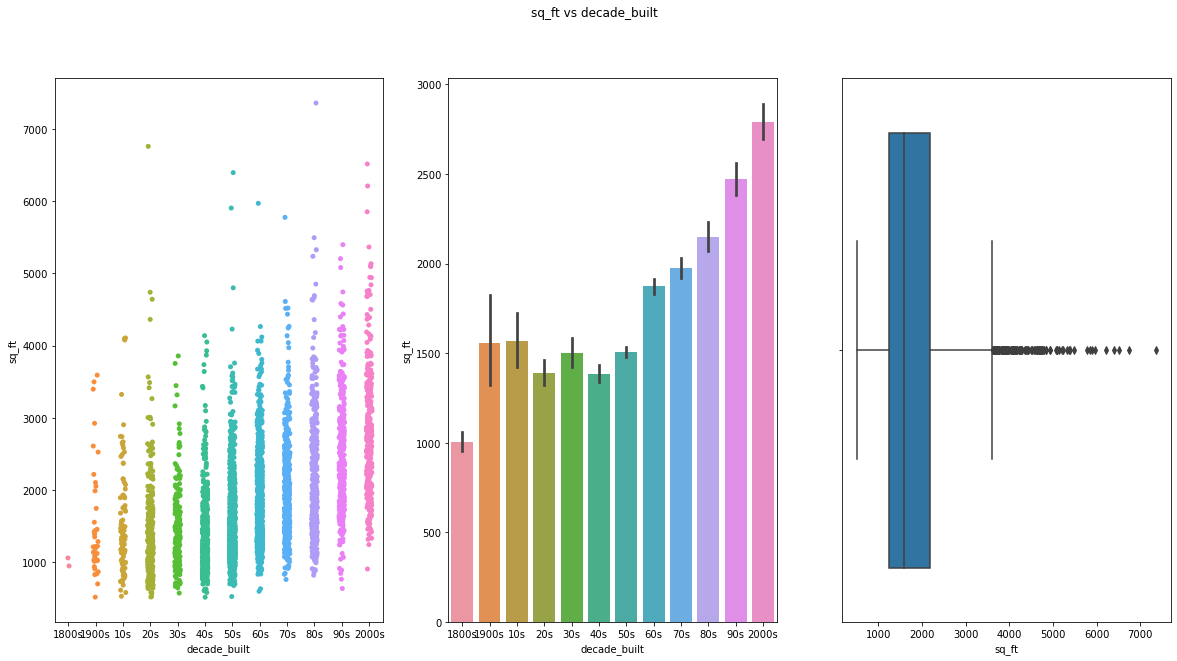

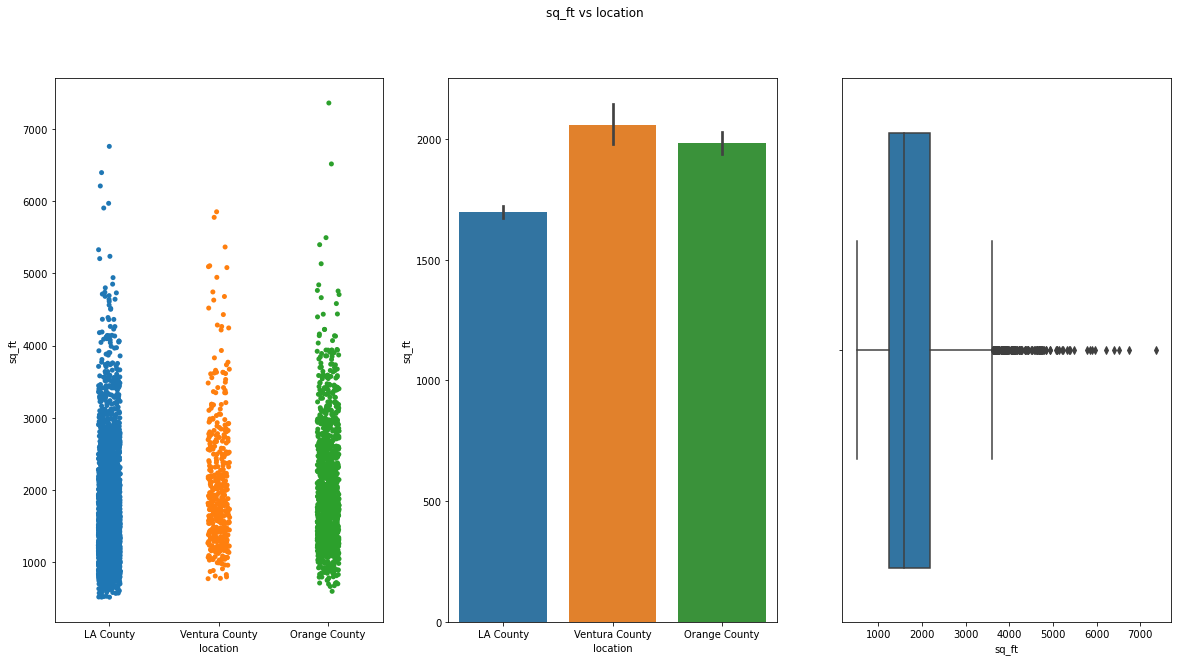

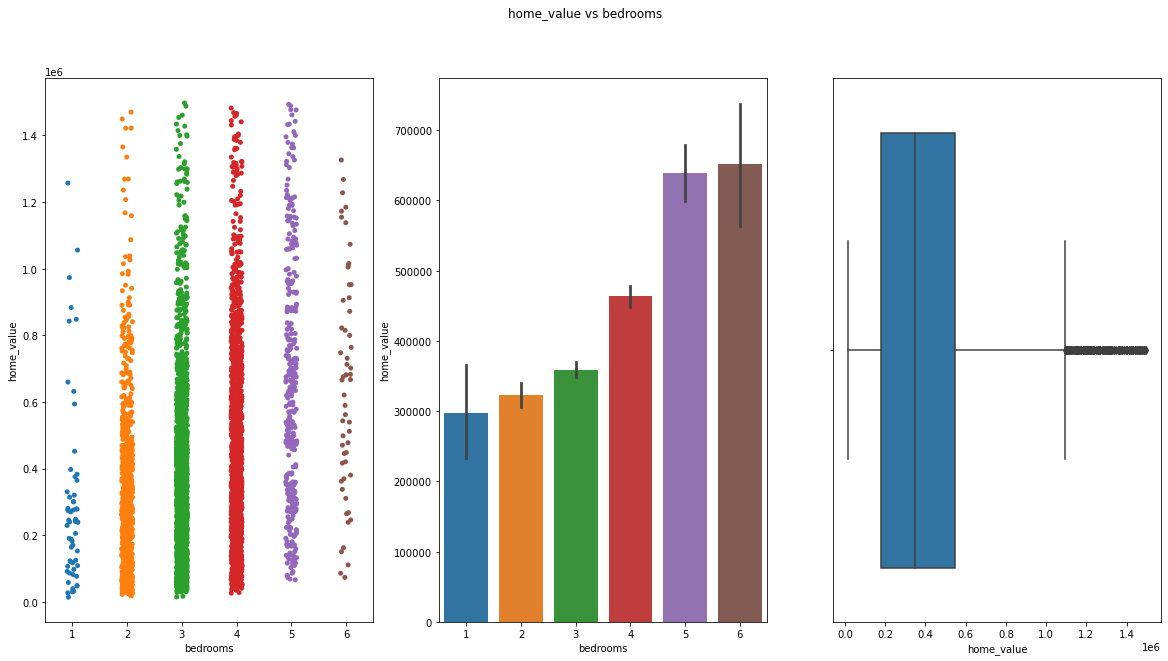

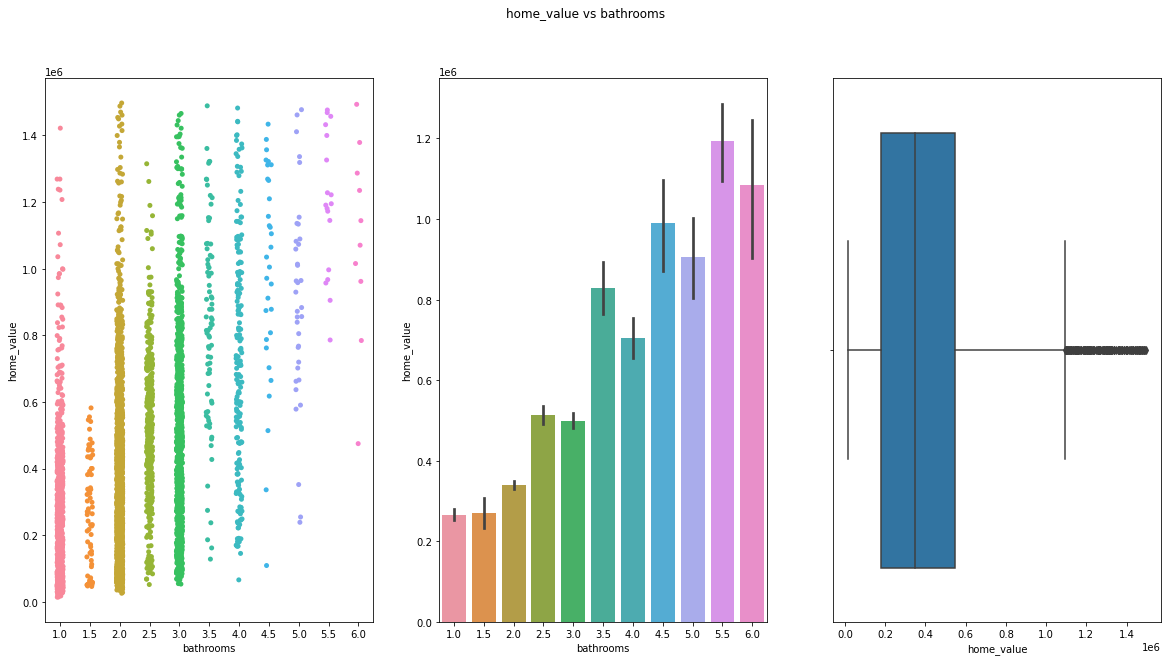

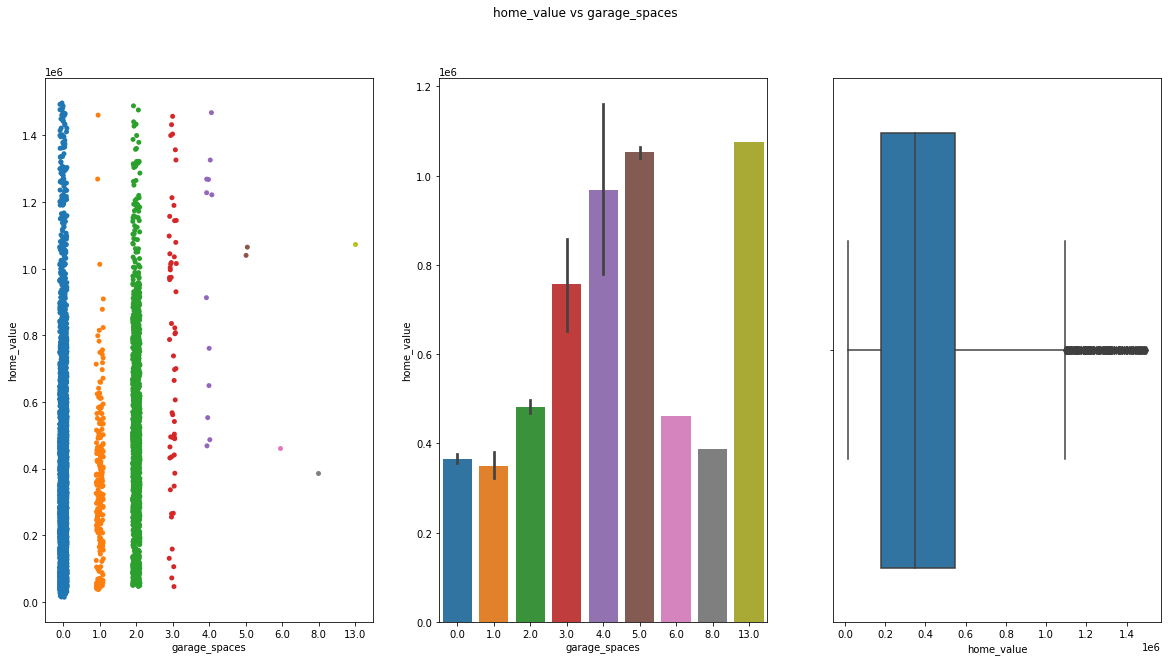

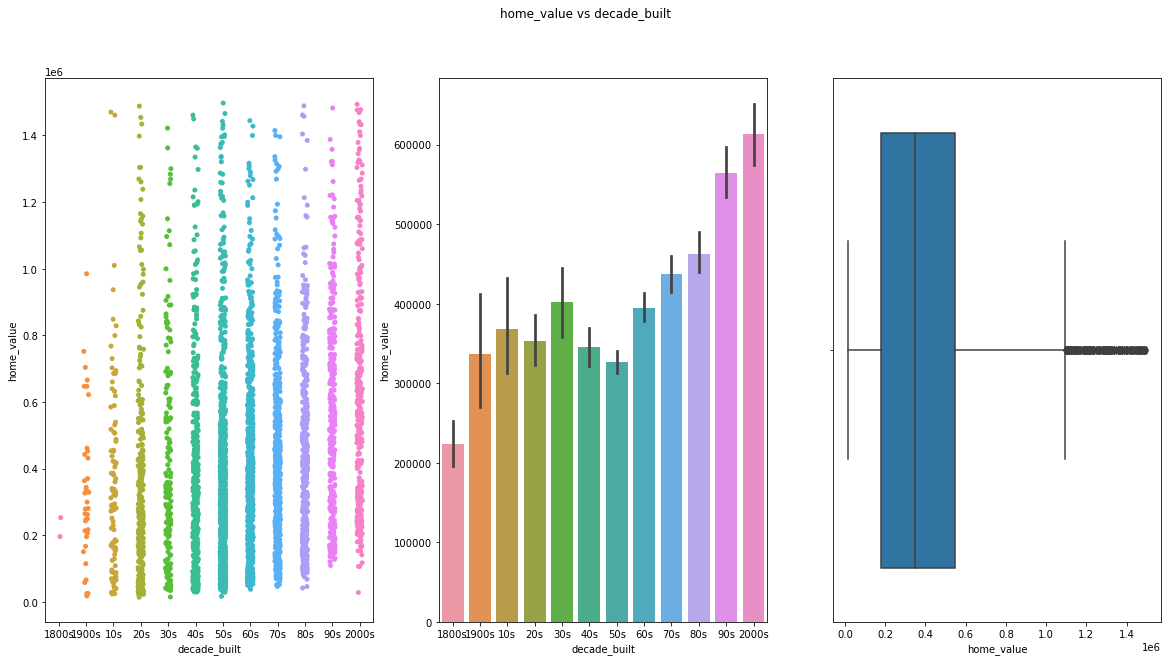

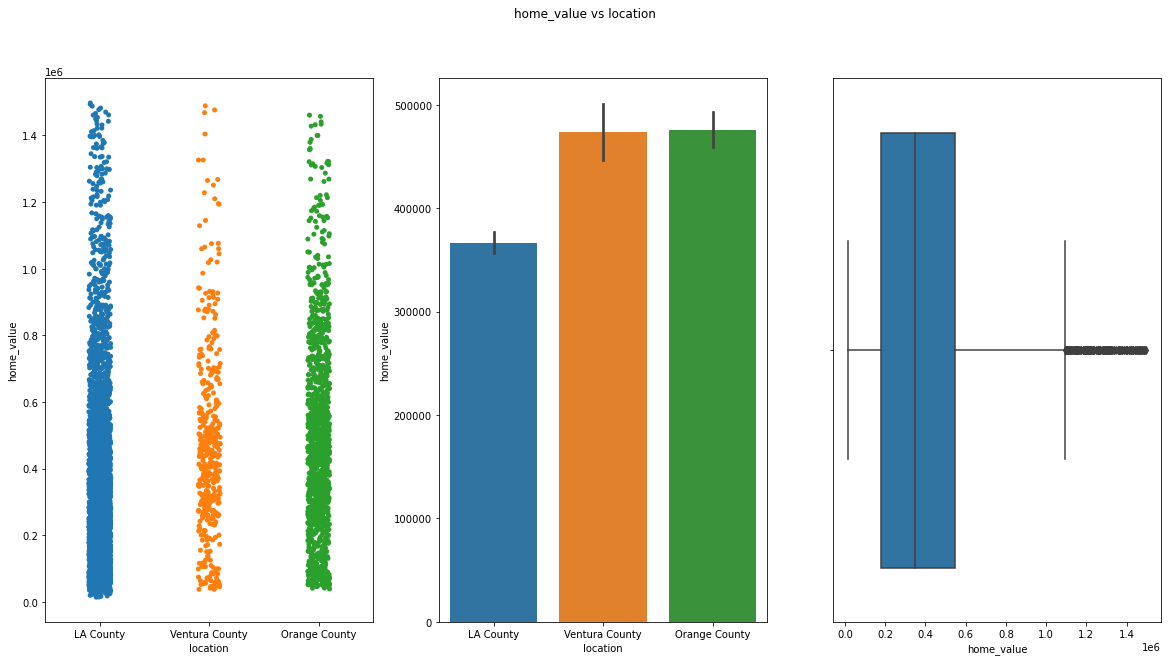

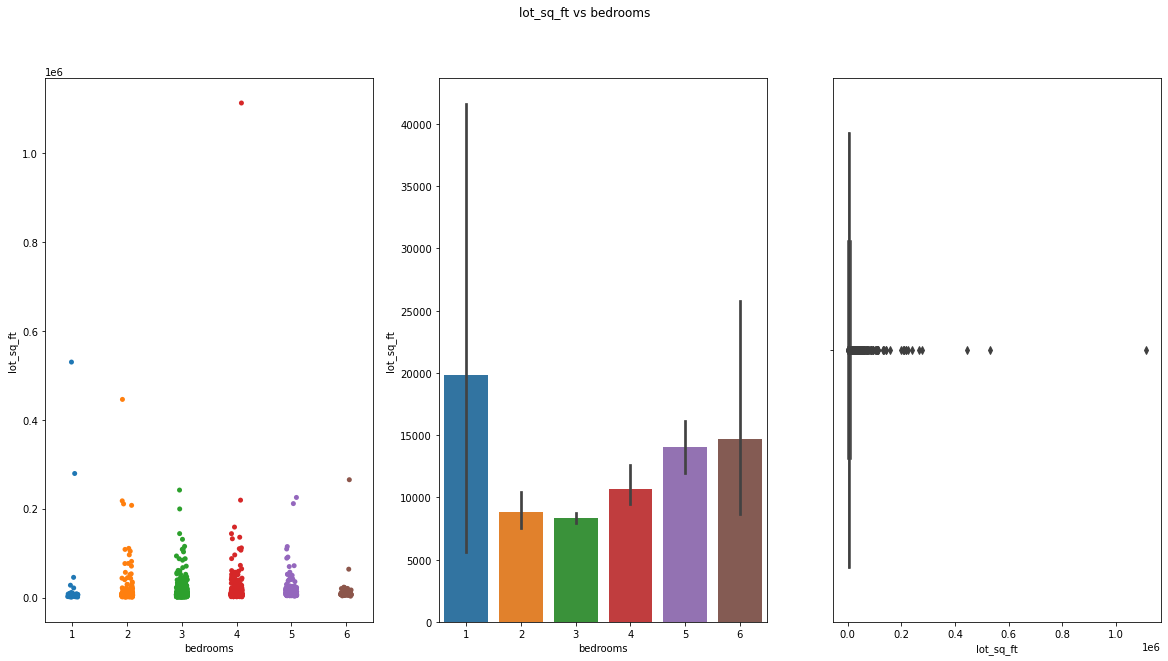

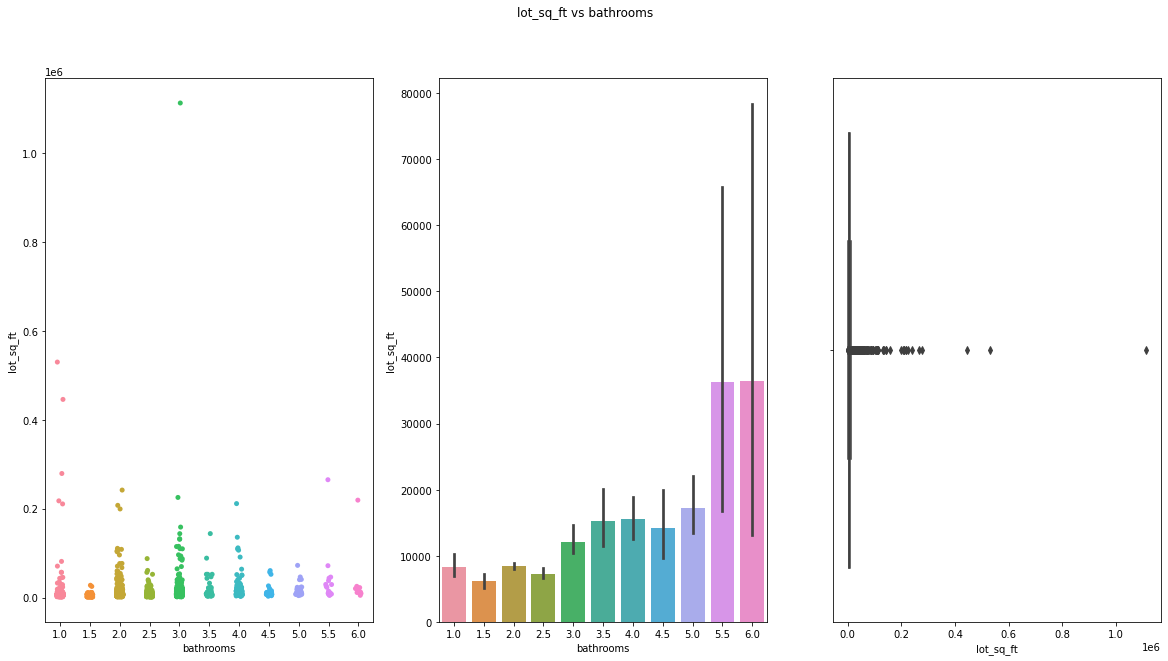

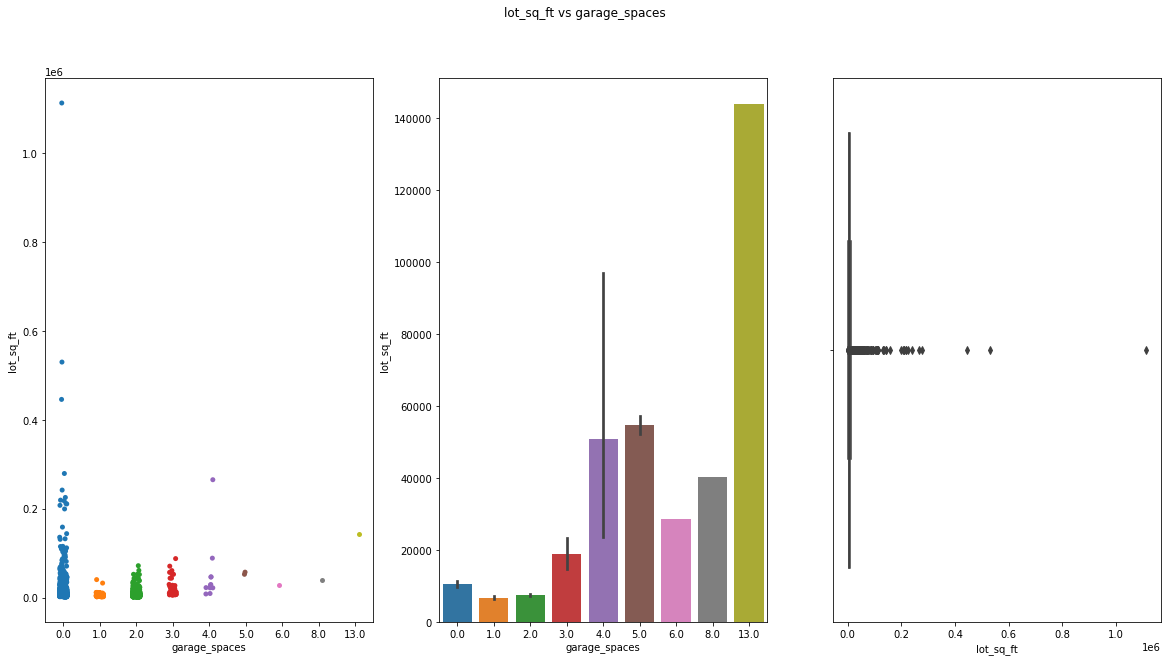

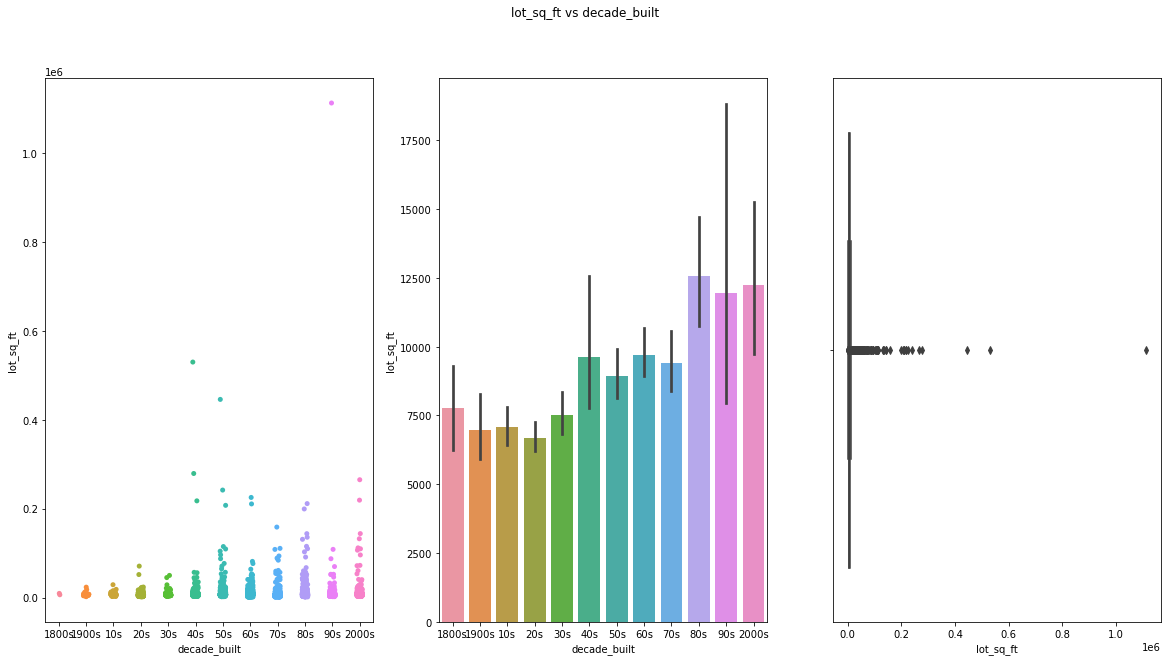

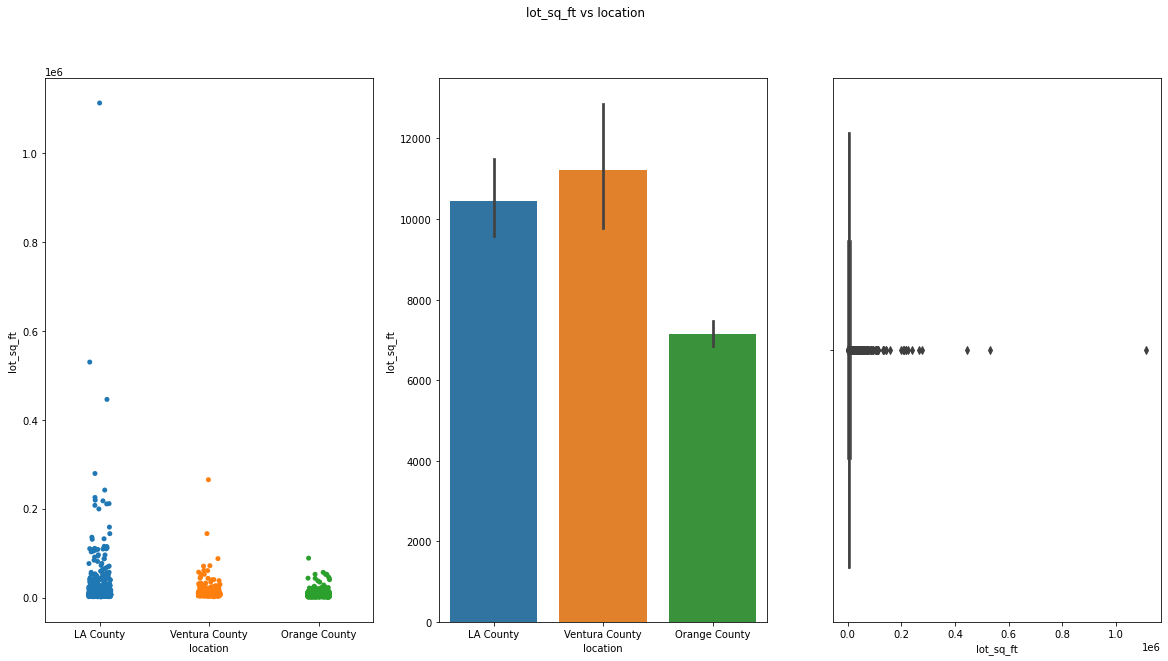

In [12]:
plot_categorical_and_continuous_vars(train, cat_cols, cont_cols)

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27028 entries, 14875 to 20163
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   logerror                    27028 non-null  float64 
 1   transactiondate             27028 non-null  object  
 2   bathrooms                   27028 non-null  float64 
 3   bedrooms                    27028 non-null  int64   
 4   sq_ft                       27028 non-null  int64   
 5   finishedsquarefeet12        27028 non-null  float64 
 6   location                    27028 non-null  object  
 7   full_bathrooms              27028 non-null  float64 
 8   garage_spaces               27028 non-null  float64 
 9   garagetotalsqft             27028 non-null  float64 
 10  latitude                    27028 non-null  float64 
 11  longitude                   27028 non-null  float64 
 12  lot_sq_ft                   27028 non-null  float64 
 13  poolcnt     

In [14]:
train.propertycountylandusecode.value_counts()

0100    14233
122      6737
0101     3065
1111     1840
1110      474
1         373
0104      174
010G       42
010M       30
0108       25
0103       23
0109        4
0102        3
0105        2
1112        1
0131        1
0130        1
Name: propertycountylandusecode, dtype: int64

In [15]:
cat_cols = ['bedrooms', 'bathrooms', 'garage_spaces', 'decade_built', 'location', 'poolcnt', 'propertycountylandusecode']
cont_cols = ['logerror']

# Creating a plot loop that iterates through all combinations of variables
def plot_categorical_and_continuous_vars(train, cat_cols, cont_cols):
    train_sample = train.sample(5000)
    for cont in cont_cols:
        for cat in cat_cols:
            fig = plt.figure(figsize= (20, 10))
            fig.suptitle(f'{cont} vs {cat}')
            

            plt.subplot(131)
            sns.stripplot(data=train_sample, x = cat, y = cont)
           

            plt.subplot(1, 3, 3)
            sns.boxplot(data = train_sample, x = cont, hue = cat)
            
            
            plt.subplot(1, 3, 2)
            sns.barplot(data = train_sample, x = cat, y = cont)

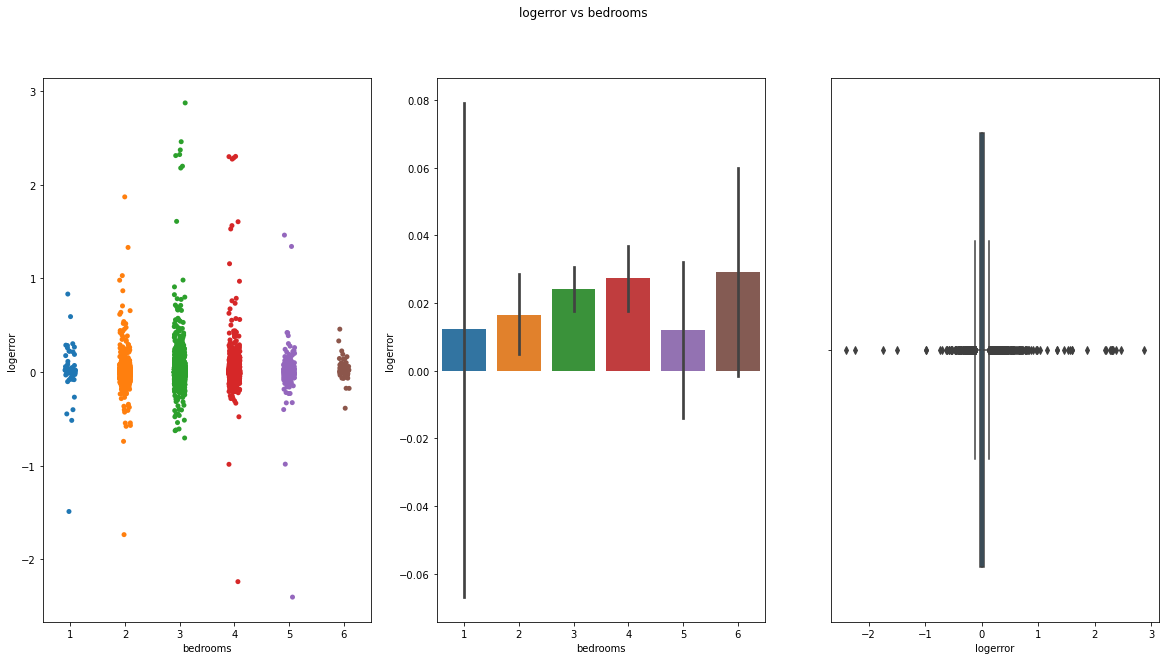

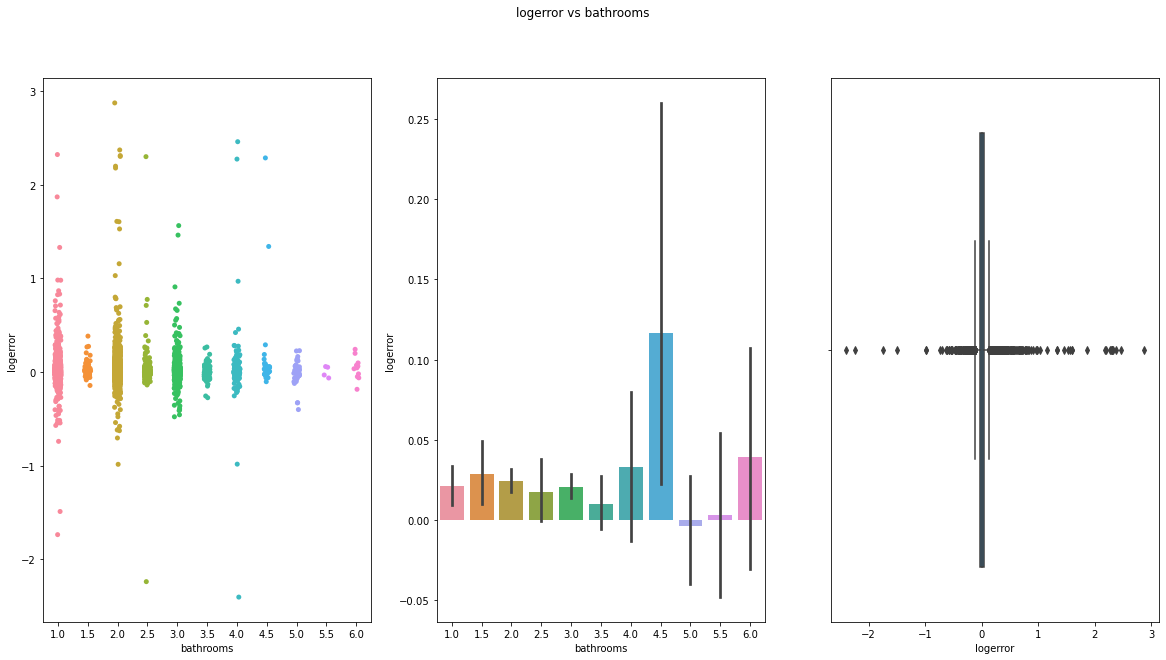

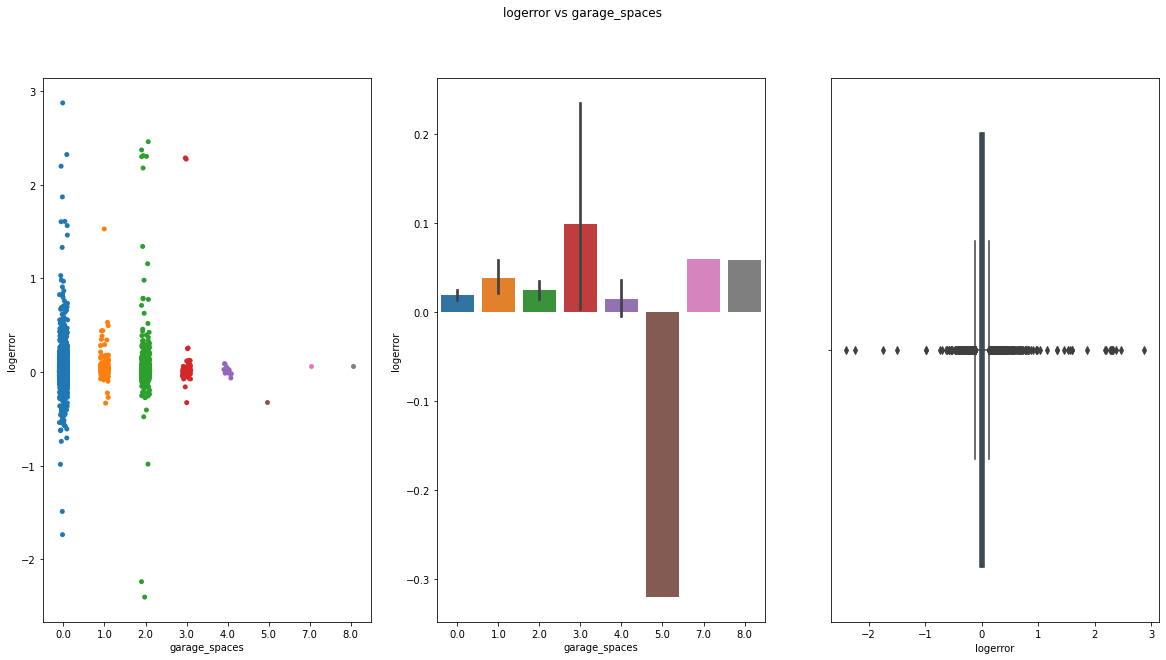

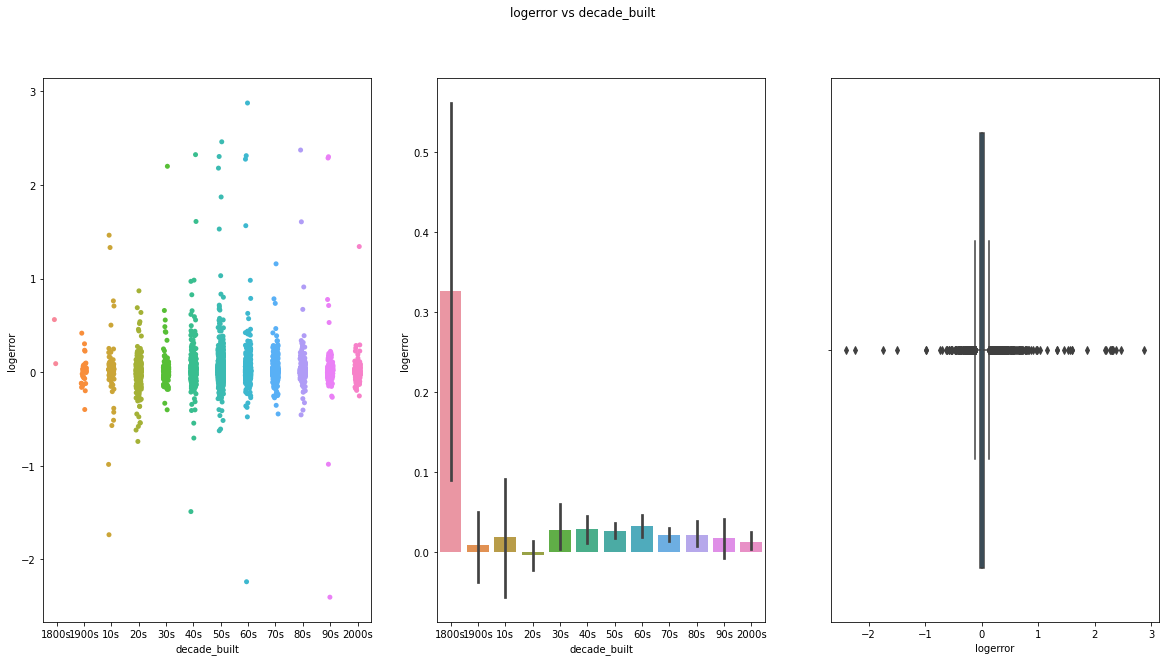

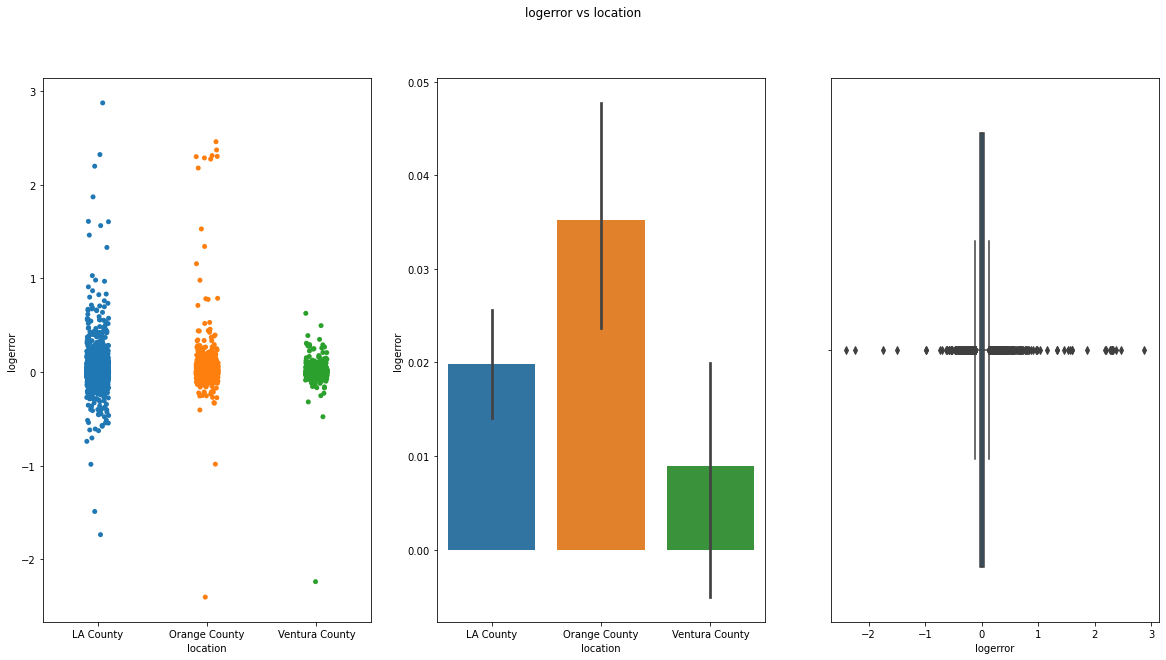

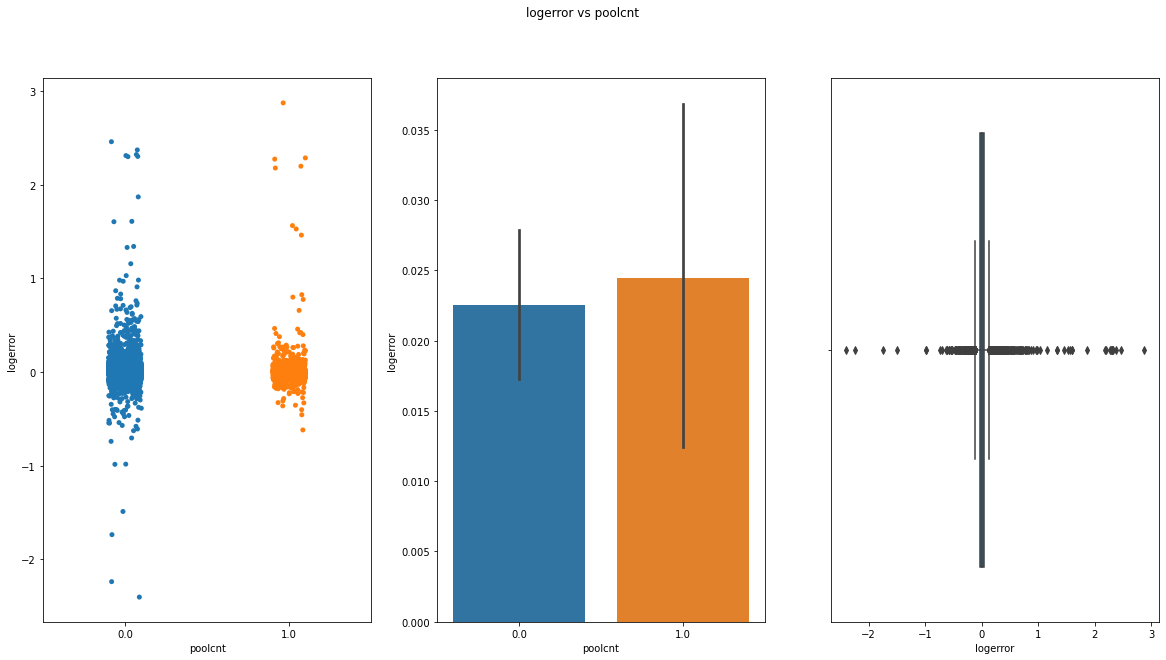

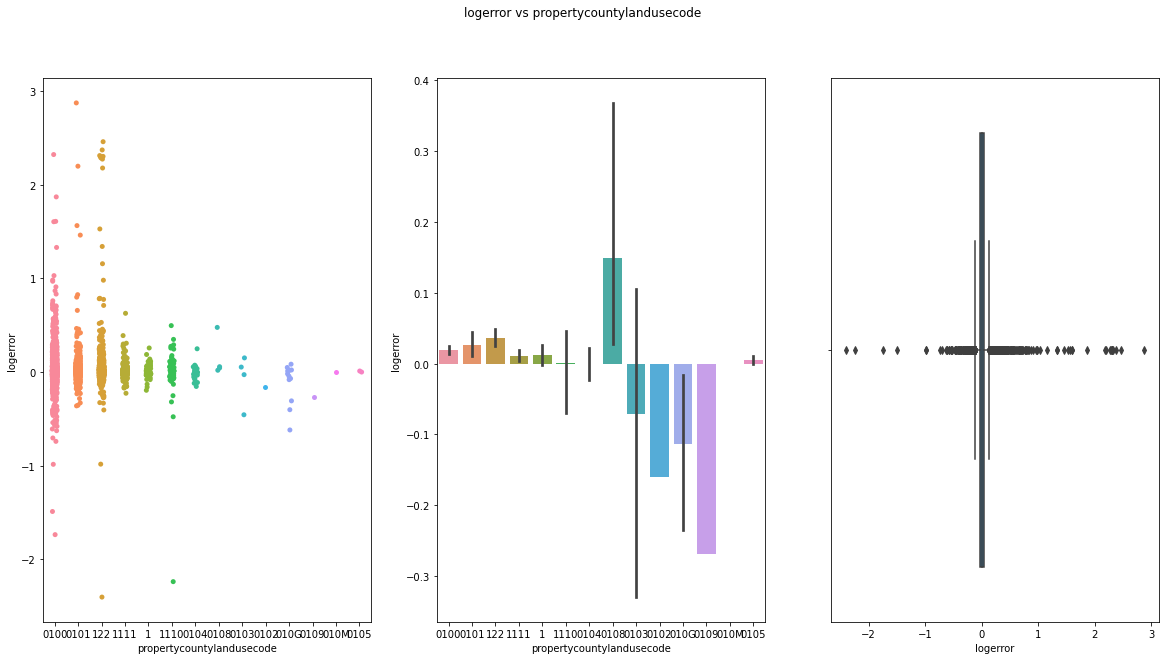

In [16]:
plot_categorical_and_continuous_vars(train, cat_cols, cont_cols)

In [17]:
print(train.latitude.nunique())
train.latitude.value_counts()

26535


34,047,500.00    5
33,494,800.00    5
33,765,800.00    4
34,487,900.00    4
34,567,163.00    3
                ..
34,073,206.00    1
34,235,902.00    1
33,877,540.00    1
34,438,755.00    1
33,982,550.00    1
Name: latitude, Length: 26535, dtype: int64

In [18]:
print(train.longitude.nunique())
train.longitude.value_counts()

26613


-117,670,000.00    5
-117,830,000.00    5
-118,249,000.00    5
-118,183,000.00    4
-118,172,000.00    4
                  ..
-119,018,024.00    1
-117,978,848.00    1
-119,265,746.00    1
-118,487,882.00    1
-118,060,920.00    1
Name: longitude, Length: 26613, dtype: int64

In [19]:
train.longitude.nunique()

26613

In [20]:
train.location.value_counts()

LA County         17603
Orange County      7110
Ventura County     2315
Name: location, dtype: int64

In [21]:
train.censustract_bin.value_counts()

0    17603
1     7110
2     2315
Name: censustract_bin, dtype: int64

In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27028 entries, 14875 to 20163
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   logerror                    27028 non-null  float64 
 1   transactiondate             27028 non-null  object  
 2   bathrooms                   27028 non-null  float64 
 3   bedrooms                    27028 non-null  int64   
 4   sq_ft                       27028 non-null  int64   
 5   finishedsquarefeet12        27028 non-null  float64 
 6   location                    27028 non-null  object  
 7   full_bathrooms              27028 non-null  float64 
 8   garage_spaces               27028 non-null  float64 
 9   garagetotalsqft             27028 non-null  float64 
 10  latitude                    27028 non-null  float64 
 11  longitude                   27028 non-null  float64 
 12  lot_sq_ft                   27028 non-null  float64 
 13  poolcnt     

## Initial Questions and Hypotheses

#### 1. Does a higher number of bedrooms increase logerror?

- Ho = More bedrooms translates to <= logerror
- Ha = More bedrooms translates to > logerror

#### 2. Does a higher number of bathrooms increase logerror?

- Ho = More bathrooms translates to <= logerror
- Ha = More bathrooms translates to > logerror

#### 3. Do more garage spaces increase logerror?

- Ho = More garage spaces translates to <= logerror
- Ha = More garage spaces translates to > logerror

#### 4. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

- Ho = Population Means of the logerrors for Orange county, LA County, and Ventura County are all equal
- Ha = Population Means of the logerrors for Orange county, LA County, and Ventura County are NOT all equal

In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27028 entries, 14875 to 20163
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   logerror                    27028 non-null  float64 
 1   transactiondate             27028 non-null  object  
 2   bathrooms                   27028 non-null  float64 
 3   bedrooms                    27028 non-null  int64   
 4   sq_ft                       27028 non-null  int64   
 5   finishedsquarefeet12        27028 non-null  float64 
 6   location                    27028 non-null  object  
 7   full_bathrooms              27028 non-null  float64 
 8   garage_spaces               27028 non-null  float64 
 9   garagetotalsqft             27028 non-null  float64 
 10  latitude                    27028 non-null  float64 
 11  longitude                   27028 non-null  float64 
 12  lot_sq_ft                   27028 non-null  float64 
 13  poolcnt     

#### 1. Does a higher number of bedrooms increase logerror?

- Ho = More bedrooms translates to <= logerror
- Ha = More bedrooms translates to > logerror

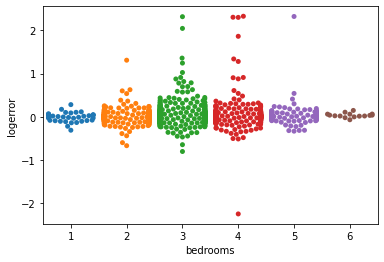

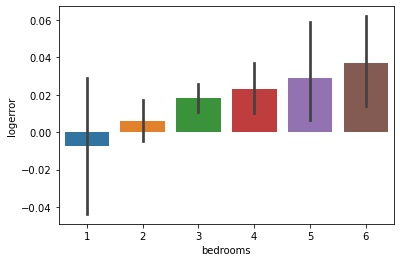

In [24]:
# Calling explore.py; applying plot function to 'bedrooms' and 'home_value'
explore.plot_categorical_and_continuous_vars(df, 'bedrooms', 'logerror')

In [25]:
# Use the scipy stats function pearsonr to calculate the correlation coefficient and the p-value.
alpha = 0.05

r_bed , p_bed = pearsonr(x = train['bedrooms'], y = train['logerror'])

r_bed , p_bed

if p_bed < alpha:
    print('The number of bedrooms is correlated with logerror.')
    print('The correlation coefficient is {}.'.format(r_bed))
else:
    print('The number of bedrooms is NOT correlated with logerror.')

The number of bedrooms is correlated with logerror.
The correlation coefficient is 0.032339808115065316.


#### Answer 1 : Yes,  higher numbers of bedrooms correlate with higher logerror
Following our statistical test, we indicate that this feature is correlated with logerror, meaning that there is statistical significance behind the claim that more bedrooms results in a higher logerror. Thus we move forward with this feature.

#### 2. Does a higher number of bathrooms increase logerror?

- Ho = More bathrooms translates to <= logerror
- Ha = More bathrooms translates to > logerror

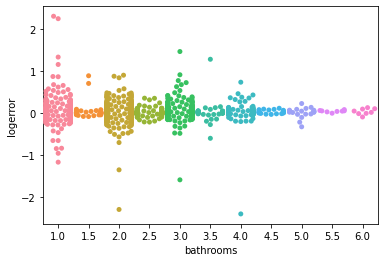

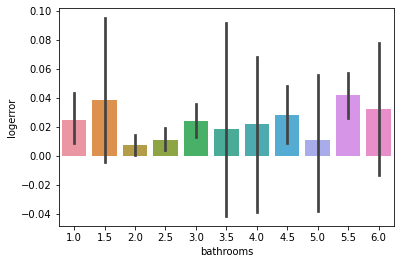

In [26]:
# Calling explore.py; applying plot function to 'bathrooms' and 'home_value'
explore.plot_categorical_and_continuous_vars(train, 'bathrooms', 'logerror')

In [27]:
# Use the scipy stats function pearsonr to calculate the correlation coefficient and the p-value.
alpha = 0.05

r_bath , p_bath = pearsonr(x = train['bathrooms'], y = train['logerror'])

r_bath , p_bath

if p_bath < alpha:
    print('The number of bathrooms is correlated with logerror.')
    print('The correlation coefficient is {}.'.format(r_bath))
else:
    print('The number of bathrooms is NOT correlated with logerror.')

The number of bathrooms is correlated with logerror.
The correlation coefficient is 0.03200763030432443.


#### Answer 2: Yes,  higher numbers of bathrooms correlate with higher logerror
Following our statistical test, we indicate that this feature is correlated with logerror, meaning that there is statistical significance behind the claim that more bathrooms results in a higher logerror. Thus we move forward with this feature.

#### 3. Do more garage spaces increase logerror?

- Ho = More garage spaces translates to <= logerror
- Ha = More garage spaces translates to > logerror

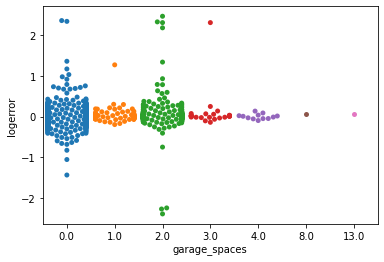

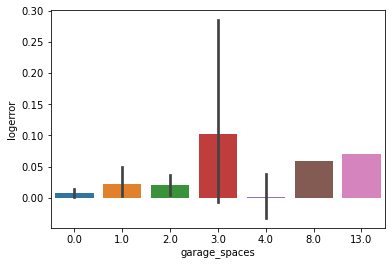

In [28]:
# Calling explore.py; applying plot function to 'garage_spaces' and 'home_value'
explore.plot_categorical_and_continuous_vars(train, 'garage_spaces', 'logerror')

In [29]:
# Use the scipy stats function pearsonr to calculate the correlation coefficient and the p-value.
alpha = 0.05

r_garage , p_garage = pearsonr(x = train['garage_spaces'], y = train['logerror'])

r_garage , p_garage

if p_garage < alpha:
    print('The number of garage spaces is correlated with logerror.')
    print('The correlation coefficient is {}.'.format(r_garage))
else:
    print('The number of garage spaces is NOT correlated with logerror.')

The number of garage spaces is correlated with logerror.
The correlation coefficient is 0.020358020673569465.


#### Answer 3: Yes, higher numbers of garage spaces correlate with higher logerror
Following our statistical test, we indicate that this feature is correlated with logerror, meaning that there is statistical significance behind the claim that more garage spaces results in a higher logerror. Thus we move forward with this feature.

#### 4. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

- Ho = Population Means of the logerrors for Orange county, LA County, and Ventura County are all equal
- Ha = Population Means of the logerrors for Orange county, LA County, and Ventura County are NOT all equal

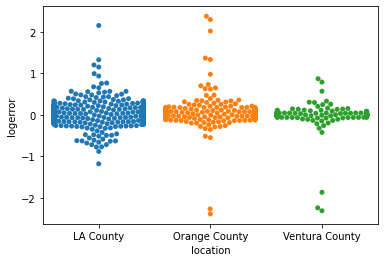

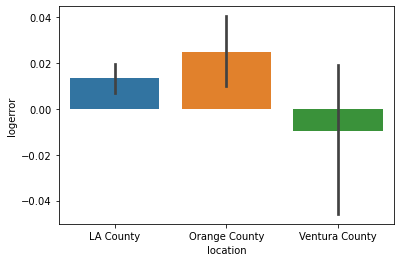

In [30]:
# Calling explore.py; applying plot function to 'location' and 'home_value'
explore.plot_categorical_and_continuous_vars(train, 'location', 'logerror')

In [31]:
# Assigning separate dfs to select only values within a certain county code
Orange = train[train.location == 'Orange County'].logerror
LA = train[train.location == 'LA County'].logerror
Ventura = train[train.location == 'Ventura County'].logerror

In [32]:
# ANOVA test for comparing 3 separate cat vars
f, p = stats.f_oneway(Orange, LA, Ventura)
f, p

print(f'f-statistic by ANOVA Test: {f}, p-value: {p}')

# set alpha : 0.05
if p < 0.05:
    print('We can reject the null hypothesis')
else:
    print('we cannot reject the null hypothesis')

f-statistic by ANOVA Test: 9.777610392467222, p-value: 5.690800330353162e-05
We can reject the null hypothesis


#### Answer 4: Yes, location by county does affect logerror
Following our statistical test, we reject the null, meaning that there is statistical significance behind the claim that the population means of the logerror for each county are NOT equal. Thus we move forward with this feature.

## Clustering Questions

#### 1. Does bedroom, bathroom, and garage space count affect log error?
- Ho = Population Means of the log errors for bedrooms, bathrooms, and garage spaces are all equal
- Ha = Population Means of the log errors for bedrooms, bathrooms, and garage spaces are NOT all equal

#### 2.  Does location, latitude, and longitude affect log error?
- Ho = Population Means of the log errors for location, latitude, and longitude are all equal
- Ha = Population Means of the log errors for location, latitude, and longitude are NOT all equal

#### 3. Do sqft, lot_sq_ft, and bath_bed_ratio affect log error?

- Ho = Population Means of the log errors for sqft, lot_sq_ft, and bath_bed_ratio are all equal
- Ha = Population Means of the log errors for sqft, lot_sq_ft, and bath_bed_ratio are NOT all equal

### 1. 

### Scaling

Features to scale:
1. latitude
2. longitude
3. sqft
4. propertycountylandusecode
5. lot_sq_ft

In [33]:
# Calling our model.py; Assigning df variables to our called function, `scale_data`
train_scaled, validate_scaled, test_scaled = model.scale_data(train, validate, test)

In [34]:
# Splitting train, validate, and test dfs on x and y FOR SCALED DF
x_train_scaled = train_scaled.drop(columns=['logerror'])
x_validate_scaled = validate_scaled.drop(columns=['logerror'])
x_test_scaled = test_scaled.drop(columns=['logerror'])

y_train_scaled = train_scaled['logerror']
y_validate_scaled = validate_scaled['logerror']
y_test_scaled = test_scaled['logerror']

In [35]:
train.head()

,logerror,transactiondate,bathrooms,bedrooms,sq_ft,finishedsquarefeet12,location,full_bathrooms,garage_spaces,garagetotalsqft,...,landtaxvaluedollarcnt,censustractandblock,decade_built,county_encoded,age,censustract_bin,bath_bed_ratio,census_county_bin,census_quarter_bin,age_bin
14875,0.08,2017-03-31,2.00,3,1185,"1,185.00",LA County,2.00,0.00,0.00,...,"425,000.00","60,375,545,111,019.00",70s,0,46,0,0.67,LA,"(60374016031015.0, 60376025083002.0]",0.33
11357,-0.06,2017-03-14,2.00,2,1494,"1,494.00",LA County,2.00,0.00,0.00,...,"168,588.00","60,374,061,011,000.00",50s,0,67,0,1.00,LA,"(60374016031015.0, 60376025083002.0]",0.47
20714,-0.10,2017-04-28,2.00,4,1120,"1,120.00",LA County,2.00,0.00,0.00,...,"119,139.00","60,372,400,201,005.00",2000s,0,14,0,0.50,LA,"(60371011101000.0, 60374016031015.0]",0.13
37077,0.00,2017-07-07,2.50,4,1667,"1,667.00",Orange County,2.00,2.00,531.00,...,"493,028.00","60,590,015,031,037.00",70s,1,47,1,0.62,Orange,"(60376025083002.0, 60590423104005.0]",0.33
14313,0.01,2017-03-29,2.00,2,1104,"1,104.00",Ventura County,2.00,2.00,0.00,...,"541,000.00","61,110,052,022,015.00",60s,2,57,2,1.00,Ventura,"(60590423104005.0, 483030105084015.0]",0.40


In [36]:
train_scaled.head()

,logerror,transactiondate,bathrooms,bedrooms,sq_ft,finishedsquarefeet12,location,full_bathrooms,garage_spaces,garagetotalsqft,...,landtaxvaluedollarcnt,censustractandblock,decade_built,county_encoded,age,censustract_bin,bath_bed_ratio,census_county_bin,census_quarter_bin,age_bin
14875,0.08,2017-03-31,0.20,0.40,0.10,"1,185.00",LA County,2.00,0.00,0.00,...,"425,000.00","60,375,545,111,019.00",70s,0,46,0,0.67,LA,"(60374016031015.0, 60376025083002.0]",0.33
11357,-0.06,2017-03-14,0.20,0.20,0.14,"1,494.00",LA County,2.00,0.00,0.00,...,"168,588.00","60,374,061,011,000.00",50s,0,67,0,1.00,LA,"(60374016031015.0, 60376025083002.0]",0.47
20714,-0.10,2017-04-28,0.20,0.60,0.09,"1,120.00",LA County,2.00,0.00,0.00,...,"119,139.00","60,372,400,201,005.00",2000s,0,14,0,0.50,LA,"(60371011101000.0, 60374016031015.0]",0.13
37077,0.00,2017-07-07,0.30,0.60,0.17,"1,667.00",Orange County,2.00,0.15,531.00,...,"493,028.00","60,590,015,031,037.00",70s,1,47,1,0.62,Orange,"(60376025083002.0, 60590423104005.0]",0.33
14313,0.01,2017-03-29,0.20,0.20,0.09,"1,104.00",Ventura County,2.00,0.15,0.00,...,"541,000.00","61,110,052,022,015.00",60s,2,57,2,1.00,Ventura,"(60590423104005.0, 483030105084015.0]",0.40


In [37]:
x_train_scaled.head()

,transactiondate,bathrooms,bedrooms,sq_ft,finishedsquarefeet12,location,full_bathrooms,garage_spaces,garagetotalsqft,latitude,...,landtaxvaluedollarcnt,censustractandblock,decade_built,county_encoded,age,censustract_bin,bath_bed_ratio,census_county_bin,census_quarter_bin,age_bin
14875,2017-03-31,0.20,0.40,0.10,"1,185.00",LA County,2.00,0.00,0.00,"33,877,093.00",...,"425,000.00","60,375,545,111,019.00",70s,0,46,0,0.67,LA,"(60374016031015.0, 60376025083002.0]",0.33
11357,2017-03-14,0.20,0.20,0.14,"1,494.00",LA County,2.00,0.00,0.00,"34,093,079.00",...,"168,588.00","60,374,061,011,000.00",50s,0,67,0,1.00,LA,"(60374016031015.0, 60376025083002.0]",0.47
20714,2017-04-28,0.20,0.60,0.09,"1,120.00",LA County,2.00,0.00,0.00,"33,955,012.00",...,"119,139.00","60,372,400,201,005.00",2000s,0,14,0,0.50,LA,"(60371011101000.0, 60374016031015.0]",0.13
37077,2017-07-07,0.30,0.60,0.17,"1,667.00",Orange County,2.00,0.15,531.00,"33,916,657.00",...,"493,028.00","60,590,015,031,037.00",70s,1,47,1,0.62,Orange,"(60376025083002.0, 60590423104005.0]",0.33
14313,2017-03-29,0.20,0.20,0.09,"1,104.00",Ventura County,2.00,0.15,0.00,"34,249,297.00",...,"541,000.00","61,110,052,022,015.00",60s,2,57,2,1.00,Ventura,"(60590423104005.0, 483030105084015.0]",0.40


In [38]:
train_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27028 entries, 14875 to 20163
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   logerror                    27028 non-null  float64 
 1   transactiondate             27028 non-null  object  
 2   bathrooms                   27028 non-null  float64 
 3   bedrooms                    27028 non-null  float64 
 4   sq_ft                       27028 non-null  float64 
 5   finishedsquarefeet12        27028 non-null  float64 
 6   location                    27028 non-null  object  
 7   full_bathrooms              27028 non-null  float64 
 8   garage_spaces               27028 non-null  float64 
 9   garagetotalsqft             27028 non-null  float64 
 10  latitude                    27028 non-null  float64 
 11  longitude                   27028 non-null  float64 
 12  lot_sq_ft                   27028 non-null  float64 
 13  poolcnt     

## Creating Clusters

#### Cluster 1: bedrooms, bathrooms, garage_spaces

In [39]:
# list of variables I will cluster on. 
cluster_vars = ['bedrooms', 'bathrooms', 'garage_spaces']
cluster_name = 'home_space_cluster'
k_range = range(2,20)

In [40]:
def find_k(x_train_scaled, cluster_vars, k_range):
    sse = []
    for k in k_range:
        kmeans = KMeans(n_clusters=k)

        # X[0] is our X_train dataframe..the first dataframe in the list of dataframes stored in X. 
        kmeans.fit(x_train_scaled[cluster_vars])

        # inertia: Sum of squared distances of samples to their closest cluster center.
        sse.append(kmeans.inertia_) 

    # compute the difference from one k to the next
    delta = [round(sse[i] - sse[i+1],0) for i in range(len(sse)-1)]

    # compute the percent difference from one k to the next
    pct_delta = [round(((sse[i] - sse[i+1])/sse[i])*100, 1) for i in range(len(sse)-1)]

    # create a dataframe with all of our metrics to compare them across values of k: SSE, delta, pct_delta
    k_comparisons_df = pd.DataFrame(dict(k=k_range[0:-1], 
                             sse=sse[0:-1], 
                             delta=delta, 
                             pct_delta=pct_delta))

    # plot k with inertia
    plt.plot(k_comparisons_df.k, k_comparisons_df.sse, 'bx-')
    plt.xlabel('k')
    plt.ylabel('SSE')
    plt.title('The Elbow Method to find the optimal k\nFor which k values do we see large decreases in SSE?')
    plt.show()

    # plot k with pct_delta
    plt.plot(k_comparisons_df.k, k_comparisons_df.pct_delta, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Percent Change')
    plt.title('For which k values are we seeing increased changes (%) in SSE?')
    plt.show()

    # plot k with delta
    plt.plot(k_comparisons_df.k, k_comparisons_df.delta, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Absolute Change in SSE')
    plt.title('For which k values are we seeing increased changes (absolute) in SSE?')
    plt.show()

    return k_comparisons_df

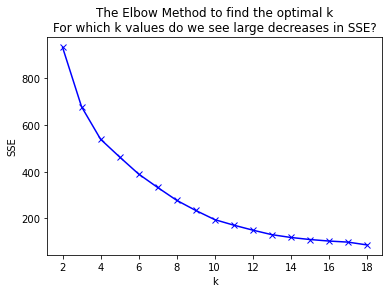

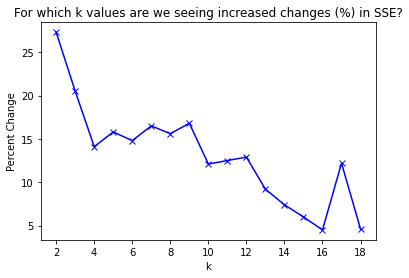

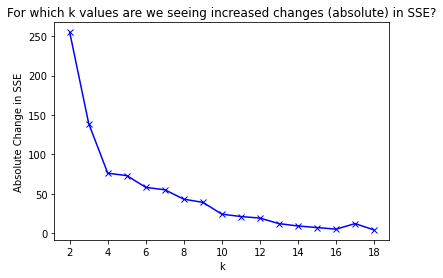

,k,sse,delta,pct_delta
0,2,933.93,255.00,27.30
1,3,678.78,139.00,20.50
2,4,539.55,76.00,14.10
3,5,463.63,73.00,15.80
4,6,390.45,58.00,14.80
5,7,332.84,55.00,16.50
6,8,277.80,43.00,15.60
7,9,234.44,39.00,16.80
8,10,195.05,24.00,12.10
9,11,171.38,21.00,12.50


In [41]:
find_k(x_train_scaled, cluster_vars, k_range)

In [42]:
k = 6
# as reminders: 
cluster_vars = ['latitude', 'longitude', 'age_bin']
cluster_name = 'area_cluster'

In [43]:
# create kmean object
kmeans = KMeans(n_clusters=6, random_state = 13)

# fit to train and assign cluster ids to observations
kmeans.fit(x_train_scaled[cluster_vars])

cluster1 = kmeans.predict(x_train_scaled[cluster_vars])
cluster1

In [ ]:
train_scaled['area_cluster'] = cluster1

#### Cluster 2: location, latitude, longitude

In [50]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27028 entries, 14875 to 20163
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   logerror                    27028 non-null  float64 
 1   transactiondate             27028 non-null  object  
 2   bathrooms                   27028 non-null  float64 
 3   bedrooms                    27028 non-null  int64   
 4   sq_ft                       27028 non-null  int64   
 5   finishedsquarefeet12        27028 non-null  float64 
 6   location                    27028 non-null  object  
 7   full_bathrooms              27028 non-null  float64 
 8   garage_spaces               27028 non-null  float64 
 9   garagetotalsqft             27028 non-null  float64 
 10  latitude                    27028 non-null  float64 
 11  longitude                   27028 non-null  float64 
 12  lot_sq_ft                   27028 non-null  float64 
 13  poolcnt     

In [53]:
# list of variables I will cluster on. 
cluster_vars = ['county_encoded', 'latitude', 'longitude']
cluster_name = 'location_cluster'
k_range = range(2,20)

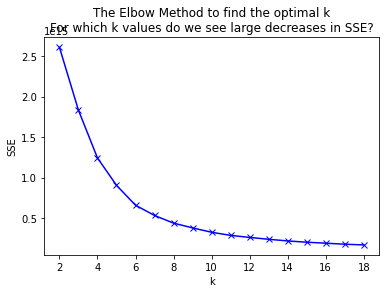

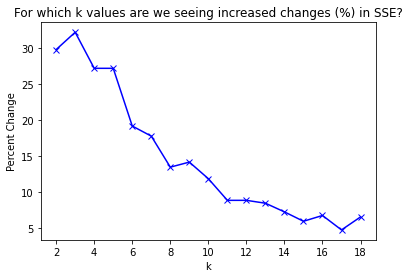

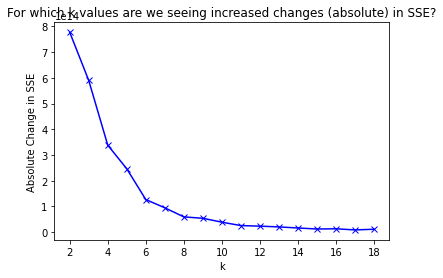

,k,sse,delta,pct_delta
0,2,"2,609,954,570,036,642.00","777,329,510,388,441.00",29.80
1,3,"1,832,625,059,648,201.00","589,943,920,571,356.00",32.20
2,4,"1,242,681,139,076,845.25","338,100,871,629,071.00",27.20
3,5,"904,580,267,447,773.88","246,219,354,619,658.00",27.20
4,6,"658,360,912,828,115.50","126,533,216,838,552.00",19.20
5,7,"531,827,695,989,563.00","94,480,139,102,640.00",17.80
6,8,"437,347,556,886,922.88","59,108,032,312,614.00",13.50
7,9,"378,239,524,574,308.38","53,732,741,755,924.00",14.20
8,10,"324,506,782,818,384.38","38,504,897,813,660.00",11.90
9,11,"286,001,885,004,724.00","25,361,890,138,572.00",8.90


In [54]:
find_k(x_train_scaled, cluster_vars, k_range)

In [ ]:
# create kmean object
kmeans = KMeans(n_clusters=6, random_state = 13)

# fit to train and assign cluster ids to observations
kmeans.fit(x_train_scaled[cluster_vars])

cluster2 = kmeans.predict(x_train_scaled[cluster_vars])
cluster2

In [ ]:
train_scaled['location_cluster'] = cluster2

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27028 entries, 14875 to 20163
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   logerror                    27028 non-null  float64 
 1   transactiondate             27028 non-null  object  
 2   bathrooms                   27028 non-null  float64 
 3   bedrooms                    27028 non-null  int64   
 4   sq_ft                       27028 non-null  int64   
 5   finishedsquarefeet12        27028 non-null  float64 
 6   location                    27028 non-null  object  
 7   full_bathrooms              27028 non-null  float64 
 8   garage_spaces               27028 non-null  float64 
 9   garagetotalsqft             27028 non-null  float64 
 10  latitude                    27028 non-null  float64 
 11  longitude                   27028 non-null  float64 
 12  lot_sq_ft                   27028 non-null  float64 
 13  poolcnt     

#### Cluster 3: sqft, lot_sq_ft, bath_bed_ratio

In [55]:
# list of variables I will cluster on. 
cluster_vars = ['sq_ft', 'lot_sq_ft', 'bath_bed_ratio']
cluster_name = 'size_cluster'
k_range = range(2,20)

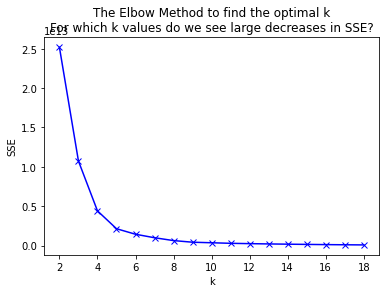

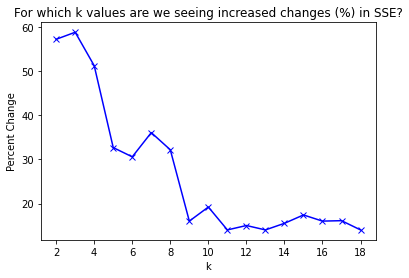

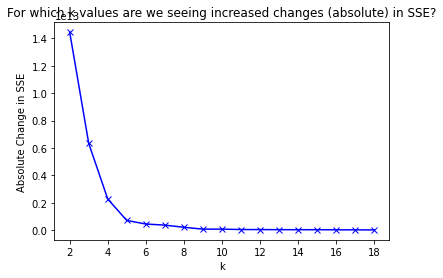

,k,sse,delta,pct_delta
0,2,"25,189,948,275,265.43","14,444,872,318,059.00",57.30
1,3,"10,745,075,957,206.52","6,330,901,226,277.00",58.90
2,4,"4,414,174,730,929.62","2,265,463,442,766.00",51.30
3,5,"2,148,711,288,163.83","703,476,222,233.00",32.70
4,6,"1,445,235,065,931.02","442,621,792,610.00",30.60
5,7,"1,002,613,273,321.40","361,871,511,597.00",36.10
6,8,"640,741,761,724.28","206,034,193,263.00",32.20
7,9,"434,707,568,461.41","69,464,175,963.00",16.00
8,10,"365,243,392,498.78","70,134,789,675.00",19.20
9,11,"295,108,602,823.58","41,303,965,836.00",14.00


In [56]:
find_k(x_train_scaled, cluster_vars, k_range)

In [57]:
# create kmean object
kmeans = KMeans(n_clusters=5, random_state = 13)

# fit to train and assign cluster ids to observations
kmeans.fit(x_train_scaled[cluster_vars])

cluster3 = kmeans.predict(x_train_scaled[cluster_vars])
cluster3

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [58]:
train_scaled['size_cluster'] = cluster3

## Initial Questions and Hypotheses

1. 

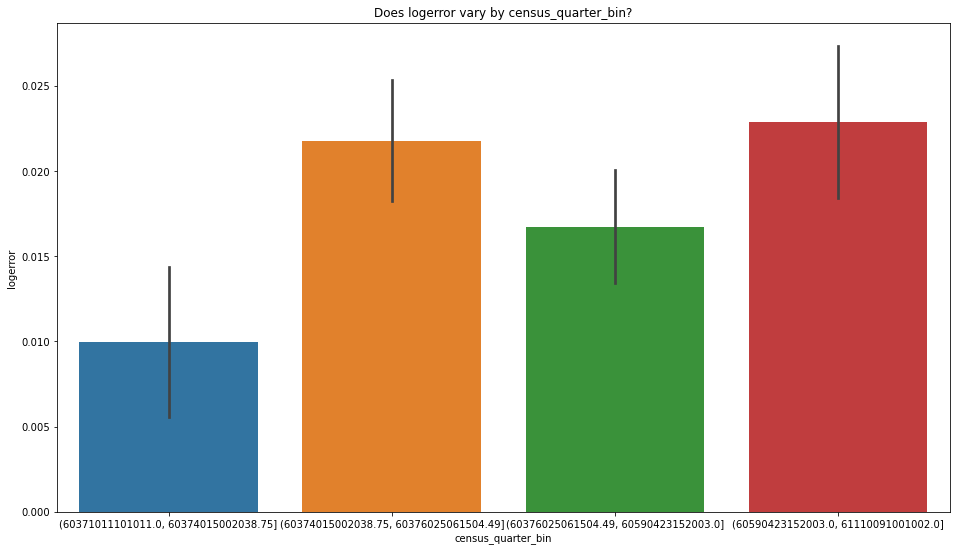

In [ ]:
train['census_quarter_bin'] = pd.qcut(train['censustractandblock'],q=4)

plt.figure(figsize=(16, 9))
sns.barplot(data = train, x='census_quarter_bin', y='logerror')
plt.title('Does logerror vary by census_quarter_bin?')
plt.show()